# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

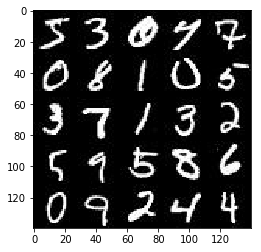

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

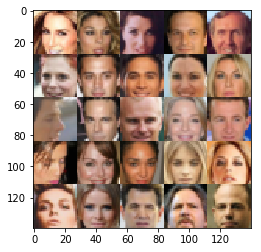

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/sarpkaramarti/anaconda/envs/dlnd/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, shape = (None, image_width, image_height, image_channels))
    inputs_z = tf.placeholder(tf.float32, shape = (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse = reuse):
        # Input layer is 28x28x3
        
        # First convolution
        d1 = tf.layers.conv2d(images, 64, 5, strides = 1, padding = 'valid')
        d1 = tf.maximum(d1*alpha, d1)
        # Layer has 24x24x64
        
        # Second convolution
        d2 = tf.layers.conv2d(d1, 128, 5, strides = 2, padding = 'same')
        d2 = tf.layers.batch_normalization(d2, training = True)
        d2 = tf.maximum(d2*alpha, d2)
        # Layer has 12x12x128
        
        # Third convolution
        d3 = tf.layers.conv2d(d2,256, 5, strides = 5, padding = 'same')
        d3 = tf.layers.batch_normalization(d3, training = True)
        d3 = tf.maximum(d3*alpha, d3)
        # Layer has 6x6
        
        # Flattening it
        flatten = tf.reshape(d3, (-1, 6*6*256))
        logits = tf.layers.dense(flatten, 1)
        out = tf.sigmoid(logits)
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):
        # first fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # reshape
        x1 = tf.reshape(x1, (-1, 4,4,512))
        # batch normalization
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        # leaky relu
        x1 = tf.maximum(x1*alpha, x1)
        # 4x4x512
        
        # first deconvolution
        d1 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        d1 = tf.layers.batch_normalization(d1, training = is_train)
        d1 = tf.maximum(d1*alpha, d1)
        # 8x8x256
        
        # second deconvolution
        d2 = tf.layers.conv2d_transpose(d1,128, 5, strides = 1, padding = 'valid')
        d2 = tf.layers.batch_normalization(d2, training = is_train)
        d2 = tf.maximum(d2*alpha, d2)
        # 12x12x128
        
        d3 = tf.layers.conv2d_transpose(d2, 64, 5, strides =2, padding = 'same')
        d3 = tf.layers.batch_normalization(d3, training = is_train)
        d3 = tf.maximum(d3*alpha, d3)
        # 24x24x64
        
        # output layer (final deconvolution)
        logits = tf.layers.conv2d_transpose(d3, out_channel_dim, 5, strides = 1, padding = 'valid')
        out = tf.tanh(logits)
        # 28x28x3
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha = 0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha = alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha = alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True, alpha = alpha)
    
    smooth = 0.1 # label smoothing
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Getting weights and biases to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode, alpha = 0.2):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    
    samples, losses = [], []
    steps = 0
    
    _, w, h, d = data_shape
    input_real, input_z, learning_rate_input = model_inputs(w, h, d, z_dim)
    
    d_train_loss, g_train_loss = model_loss(input_real, input_z, d, alpha = alpha)
    
    d_train_opt, g_train_opt = model_opt(d_train_loss, g_train_loss, learning_rate, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                # run optimizers
                _ = sess.run(d_train_opt, feed_dict = {input_real: batch_images, input_z: batch_z,
                                                       learning_rate_input: learning_rate})
                _ = sess.run(g_train_opt, feed_dict = {input_z: batch_z, input_real: batch_images,
                                                       learning_rate_input: learning_rate})
                _ = sess.run(g_train_opt, feed_dict = {input_z: batch_z, input_real: batch_images,
                                                       learning_rate_input: learning_rate})
                
                if steps % 10 == 0:
                    d_loss = d_train_loss.eval({input_z: batch_z, input_real: batch_images})
                    g_loss = g_train_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(d_loss),
                          "Generator Loss: {:.4f}".format(g_loss))
                    # Save losses to view after training
                    losses.append((d_loss, g_loss))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 10, input_z, d, data_image_mode)
    
    #return losses, samples
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.6005... Generator Loss: 4.3249
Epoch 1/2... Discriminator Loss: 0.7348... Generator Loss: 4.2936
Epoch 1/2... Discriminator Loss: 0.8655... Generator Loss: 1.3170
Epoch 1/2... Discriminator Loss: 2.2551... Generator Loss: 0.1786
Epoch 1/2... Discriminator Loss: 2.4626... Generator Loss: 0.2079
Epoch 1/2... Discriminator Loss: 2.0098... Generator Loss: 0.4113
Epoch 1/2... Discriminator Loss: 1.8060... Generator Loss: 0.4111
Epoch 1/2... Discriminator Loss: 2.6727... Generator Loss: 0.1359
Epoch 1/2... Discriminator Loss: 2.2919... Generator Loss: 0.3569
Epoch 1/2... Discriminator Loss: 1.6077... Generator Loss: 0.4822


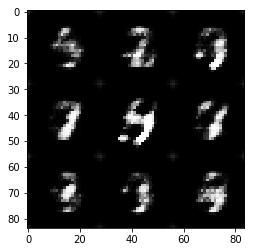

Epoch 1/2... Discriminator Loss: 1.8258... Generator Loss: 0.4699
Epoch 1/2... Discriminator Loss: 1.9097... Generator Loss: 0.3395
Epoch 1/2... Discriminator Loss: 1.4631... Generator Loss: 0.5920
Epoch 1/2... Discriminator Loss: 1.5798... Generator Loss: 0.6222
Epoch 1/2... Discriminator Loss: 1.4750... Generator Loss: 0.7531
Epoch 1/2... Discriminator Loss: 1.9694... Generator Loss: 0.3633
Epoch 1/2... Discriminator Loss: 1.7408... Generator Loss: 0.6262
Epoch 1/2... Discriminator Loss: 1.8116... Generator Loss: 0.3701
Epoch 1/2... Discriminator Loss: 1.8568... Generator Loss: 0.4801
Epoch 1/2... Discriminator Loss: 1.5197... Generator Loss: 0.5200


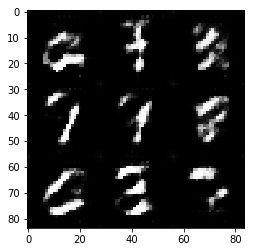

Epoch 1/2... Discriminator Loss: 1.6781... Generator Loss: 0.4886
Epoch 1/2... Discriminator Loss: 1.9559... Generator Loss: 0.4385
Epoch 1/2... Discriminator Loss: 1.8830... Generator Loss: 0.4808
Epoch 1/2... Discriminator Loss: 1.6159... Generator Loss: 0.4715
Epoch 1/2... Discriminator Loss: 1.6090... Generator Loss: 0.5988
Epoch 1/2... Discriminator Loss: 1.8218... Generator Loss: 0.3618
Epoch 1/2... Discriminator Loss: 1.6488... Generator Loss: 0.6533
Epoch 1/2... Discriminator Loss: 1.8242... Generator Loss: 0.3420
Epoch 1/2... Discriminator Loss: 1.8452... Generator Loss: 0.3154
Epoch 1/2... Discriminator Loss: 1.6953... Generator Loss: 0.3814


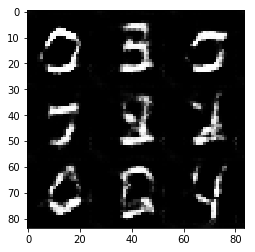

Epoch 1/2... Discriminator Loss: 1.6856... Generator Loss: 0.5242
Epoch 1/2... Discriminator Loss: 1.8238... Generator Loss: 0.3596
Epoch 1/2... Discriminator Loss: 1.6814... Generator Loss: 0.6682
Epoch 1/2... Discriminator Loss: 1.6198... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 1.6777... Generator Loss: 0.8035
Epoch 1/2... Discriminator Loss: 1.3166... Generator Loss: 0.7910
Epoch 1/2... Discriminator Loss: 1.8722... Generator Loss: 0.3431
Epoch 1/2... Discriminator Loss: 1.5842... Generator Loss: 0.4867
Epoch 1/2... Discriminator Loss: 1.6311... Generator Loss: 0.5844
Epoch 1/2... Discriminator Loss: 1.7481... Generator Loss: 0.3961


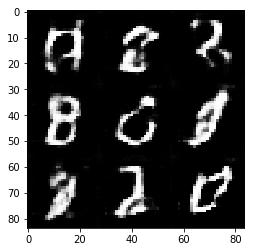

Epoch 1/2... Discriminator Loss: 1.8122... Generator Loss: 0.4385
Epoch 1/2... Discriminator Loss: 1.7608... Generator Loss: 0.4765
Epoch 1/2... Discriminator Loss: 1.7727... Generator Loss: 0.4858
Epoch 1/2... Discriminator Loss: 1.6289... Generator Loss: 0.7825
Epoch 1/2... Discriminator Loss: 1.4885... Generator Loss: 1.3579
Epoch 1/2... Discriminator Loss: 1.7411... Generator Loss: 0.3555
Epoch 1/2... Discriminator Loss: 1.8192... Generator Loss: 0.3567
Epoch 1/2... Discriminator Loss: 1.5099... Generator Loss: 0.6589
Epoch 1/2... Discriminator Loss: 1.5320... Generator Loss: 0.8534
Epoch 1/2... Discriminator Loss: 1.5204... Generator Loss: 0.4186


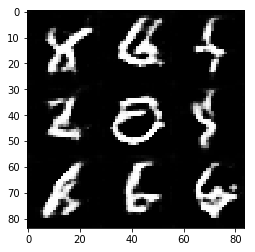

Epoch 1/2... Discriminator Loss: 1.6423... Generator Loss: 0.4061
Epoch 1/2... Discriminator Loss: 1.6969... Generator Loss: 0.3407
Epoch 1/2... Discriminator Loss: 1.4623... Generator Loss: 0.5317
Epoch 1/2... Discriminator Loss: 1.6859... Generator Loss: 0.3573
Epoch 1/2... Discriminator Loss: 1.5850... Generator Loss: 1.0192
Epoch 1/2... Discriminator Loss: 1.7356... Generator Loss: 0.3531
Epoch 1/2... Discriminator Loss: 1.7701... Generator Loss: 0.3436
Epoch 1/2... Discriminator Loss: 1.6605... Generator Loss: 0.4820
Epoch 1/2... Discriminator Loss: 1.5704... Generator Loss: 0.8173
Epoch 1/2... Discriminator Loss: 1.5955... Generator Loss: 1.6702


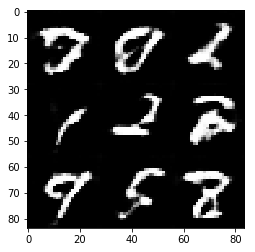

Epoch 1/2... Discriminator Loss: 1.7657... Generator Loss: 0.6286
Epoch 1/2... Discriminator Loss: 1.4696... Generator Loss: 0.5408
Epoch 1/2... Discriminator Loss: 1.6816... Generator Loss: 0.3437
Epoch 1/2... Discriminator Loss: 1.4342... Generator Loss: 0.6233
Epoch 1/2... Discriminator Loss: 1.4795... Generator Loss: 0.5840
Epoch 1/2... Discriminator Loss: 1.9044... Generator Loss: 0.8688
Epoch 1/2... Discriminator Loss: 1.3896... Generator Loss: 0.6290
Epoch 1/2... Discriminator Loss: 1.6165... Generator Loss: 0.4163
Epoch 1/2... Discriminator Loss: 2.0514... Generator Loss: 0.2133
Epoch 1/2... Discriminator Loss: 1.6516... Generator Loss: 0.3943


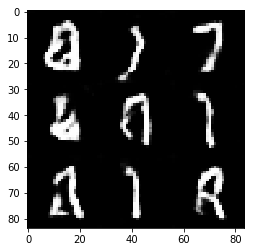

Epoch 1/2... Discriminator Loss: 1.9691... Generator Loss: 0.2542
Epoch 1/2... Discriminator Loss: 1.4991... Generator Loss: 0.4873
Epoch 1/2... Discriminator Loss: 1.7119... Generator Loss: 0.3383
Epoch 1/2... Discriminator Loss: 1.6840... Generator Loss: 0.3155
Epoch 1/2... Discriminator Loss: 1.4692... Generator Loss: 0.8364
Epoch 1/2... Discriminator Loss: 1.6180... Generator Loss: 0.6178
Epoch 1/2... Discriminator Loss: 1.4712... Generator Loss: 0.9337
Epoch 1/2... Discriminator Loss: 1.5935... Generator Loss: 0.5125
Epoch 1/2... Discriminator Loss: 1.5427... Generator Loss: 0.4869
Epoch 1/2... Discriminator Loss: 1.4608... Generator Loss: 0.5441


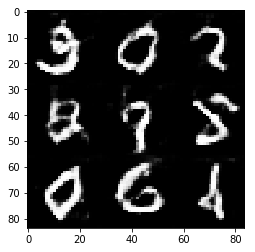

Epoch 1/2... Discriminator Loss: 1.3922... Generator Loss: 0.9095
Epoch 1/2... Discriminator Loss: 1.5681... Generator Loss: 0.4363
Epoch 1/2... Discriminator Loss: 1.6095... Generator Loss: 0.4233
Epoch 1/2... Discriminator Loss: 1.3607... Generator Loss: 1.0388
Epoch 1/2... Discriminator Loss: 1.4518... Generator Loss: 0.6333
Epoch 1/2... Discriminator Loss: 1.3944... Generator Loss: 0.6559
Epoch 1/2... Discriminator Loss: 1.5264... Generator Loss: 0.7870
Epoch 1/2... Discriminator Loss: 1.3155... Generator Loss: 0.6530
Epoch 1/2... Discriminator Loss: 1.9051... Generator Loss: 0.2737
Epoch 1/2... Discriminator Loss: 1.4148... Generator Loss: 0.5648


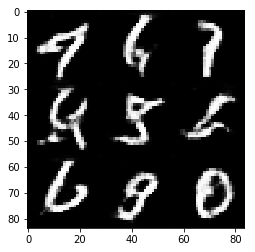

Epoch 1/2... Discriminator Loss: 1.4566... Generator Loss: 0.5439
Epoch 1/2... Discriminator Loss: 1.3883... Generator Loss: 1.0119
Epoch 1/2... Discriminator Loss: 1.6755... Generator Loss: 0.3943
Epoch 2/2... Discriminator Loss: 1.3173... Generator Loss: 0.6069
Epoch 2/2... Discriminator Loss: 1.5477... Generator Loss: 0.5004
Epoch 2/2... Discriminator Loss: 1.3933... Generator Loss: 0.9197
Epoch 2/2... Discriminator Loss: 1.5255... Generator Loss: 0.5436
Epoch 2/2... Discriminator Loss: 1.6808... Generator Loss: 0.3553
Epoch 2/2... Discriminator Loss: 1.5944... Generator Loss: 0.8066
Epoch 2/2... Discriminator Loss: 1.5127... Generator Loss: 0.8150


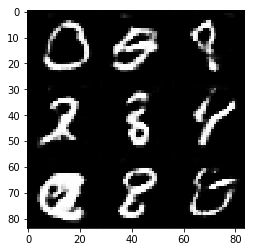

Epoch 2/2... Discriminator Loss: 1.3988... Generator Loss: 0.6118
Epoch 2/2... Discriminator Loss: 1.3706... Generator Loss: 0.7126
Epoch 2/2... Discriminator Loss: 1.7076... Generator Loss: 0.3182
Epoch 2/2... Discriminator Loss: 1.6380... Generator Loss: 0.4711
Epoch 2/2... Discriminator Loss: 1.7350... Generator Loss: 0.3133
Epoch 2/2... Discriminator Loss: 1.5264... Generator Loss: 0.5123
Epoch 2/2... Discriminator Loss: 1.4680... Generator Loss: 0.5475
Epoch 2/2... Discriminator Loss: 1.7062... Generator Loss: 0.3375
Epoch 2/2... Discriminator Loss: 1.6056... Generator Loss: 0.6050
Epoch 2/2... Discriminator Loss: 1.3482... Generator Loss: 0.7390


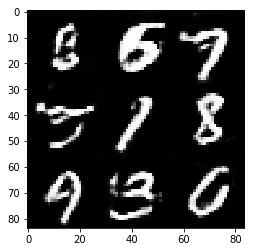

Epoch 2/2... Discriminator Loss: 1.3032... Generator Loss: 0.7382
Epoch 2/2... Discriminator Loss: 1.3644... Generator Loss: 1.1885
Epoch 2/2... Discriminator Loss: 1.6159... Generator Loss: 0.4374
Epoch 2/2... Discriminator Loss: 1.4151... Generator Loss: 0.7034
Epoch 2/2... Discriminator Loss: 1.5913... Generator Loss: 0.4339
Epoch 2/2... Discriminator Loss: 1.9470... Generator Loss: 0.2642
Epoch 2/2... Discriminator Loss: 1.2941... Generator Loss: 0.7542
Epoch 2/2... Discriminator Loss: 1.6336... Generator Loss: 0.3562
Epoch 2/2... Discriminator Loss: 1.3854... Generator Loss: 0.8686
Epoch 2/2... Discriminator Loss: 1.6006... Generator Loss: 0.4225


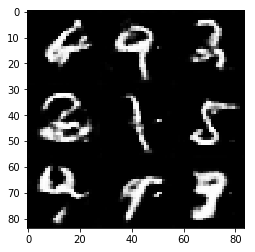

Epoch 2/2... Discriminator Loss: 1.5195... Generator Loss: 0.3930
Epoch 2/2... Discriminator Loss: 1.4345... Generator Loss: 0.7589
Epoch 2/2... Discriminator Loss: 2.3537... Generator Loss: 0.1575
Epoch 2/2... Discriminator Loss: 1.3462... Generator Loss: 0.7194
Epoch 2/2... Discriminator Loss: 1.3280... Generator Loss: 1.0660
Epoch 2/2... Discriminator Loss: 1.5940... Generator Loss: 0.4475
Epoch 2/2... Discriminator Loss: 1.5589... Generator Loss: 0.5468
Epoch 2/2... Discriminator Loss: 1.6027... Generator Loss: 0.3810
Epoch 2/2... Discriminator Loss: 1.4255... Generator Loss: 0.8037
Epoch 2/2... Discriminator Loss: 1.5084... Generator Loss: 0.7419


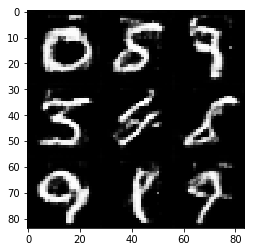

Epoch 2/2... Discriminator Loss: 1.5484... Generator Loss: 0.5112
Epoch 2/2... Discriminator Loss: 1.6256... Generator Loss: 0.9742
Epoch 2/2... Discriminator Loss: 1.6478... Generator Loss: 0.3516
Epoch 2/2... Discriminator Loss: 1.4386... Generator Loss: 0.5207
Epoch 2/2... Discriminator Loss: 1.4766... Generator Loss: 0.4489
Epoch 2/2... Discriminator Loss: 1.3656... Generator Loss: 0.5891
Epoch 2/2... Discriminator Loss: 1.5426... Generator Loss: 0.4545
Epoch 2/2... Discriminator Loss: 1.1956... Generator Loss: 0.6604
Epoch 2/2... Discriminator Loss: 1.6157... Generator Loss: 0.3757
Epoch 2/2... Discriminator Loss: 1.7232... Generator Loss: 0.3339


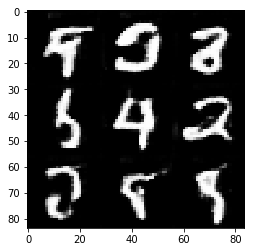

Epoch 2/2... Discriminator Loss: 1.3160... Generator Loss: 0.7006
Epoch 2/2... Discriminator Loss: 1.4490... Generator Loss: 0.8692
Epoch 2/2... Discriminator Loss: 1.4228... Generator Loss: 0.5800
Epoch 2/2... Discriminator Loss: 1.3681... Generator Loss: 0.4859
Epoch 2/2... Discriminator Loss: 1.5889... Generator Loss: 1.1552
Epoch 2/2... Discriminator Loss: 1.3368... Generator Loss: 0.6479
Epoch 2/2... Discriminator Loss: 1.3390... Generator Loss: 0.6022
Epoch 2/2... Discriminator Loss: 1.4723... Generator Loss: 1.5921
Epoch 2/2... Discriminator Loss: 1.5763... Generator Loss: 0.4974
Epoch 2/2... Discriminator Loss: 1.1830... Generator Loss: 0.6783


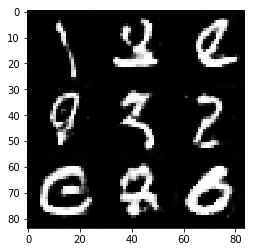

Epoch 2/2... Discriminator Loss: 1.3655... Generator Loss: 0.6816
Epoch 2/2... Discriminator Loss: 1.4800... Generator Loss: 0.5313
Epoch 2/2... Discriminator Loss: 1.3231... Generator Loss: 1.2191
Epoch 2/2... Discriminator Loss: 1.1834... Generator Loss: 1.2123
Epoch 2/2... Discriminator Loss: 1.3413... Generator Loss: 0.6776
Epoch 2/2... Discriminator Loss: 1.3538... Generator Loss: 0.7339
Epoch 2/2... Discriminator Loss: 1.6264... Generator Loss: 0.4237
Epoch 2/2... Discriminator Loss: 1.3989... Generator Loss: 0.8847
Epoch 2/2... Discriminator Loss: 1.6569... Generator Loss: 0.3640
Epoch 2/2... Discriminator Loss: 1.3065... Generator Loss: 0.8753


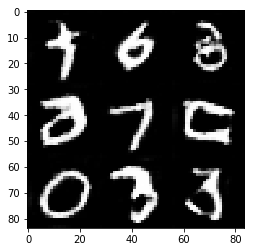

Epoch 2/2... Discriminator Loss: 1.5582... Generator Loss: 0.4078
Epoch 2/2... Discriminator Loss: 1.2743... Generator Loss: 0.8125
Epoch 2/2... Discriminator Loss: 1.3492... Generator Loss: 0.5200
Epoch 2/2... Discriminator Loss: 1.4171... Generator Loss: 0.4620
Epoch 2/2... Discriminator Loss: 1.3379... Generator Loss: 1.1490
Epoch 2/2... Discriminator Loss: 1.2146... Generator Loss: 0.8004
Epoch 2/2... Discriminator Loss: 1.7050... Generator Loss: 0.3198
Epoch 2/2... Discriminator Loss: 1.7319... Generator Loss: 0.3363
Epoch 2/2... Discriminator Loss: 1.1102... Generator Loss: 0.8743
Epoch 2/2... Discriminator Loss: 1.8750... Generator Loss: 0.2711


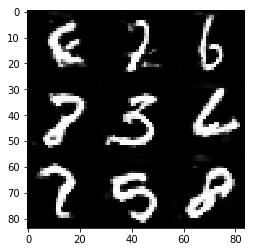

Epoch 2/2... Discriminator Loss: 1.1316... Generator Loss: 1.1369
Epoch 2/2... Discriminator Loss: 1.4037... Generator Loss: 0.6463
Epoch 2/2... Discriminator Loss: 1.5740... Generator Loss: 0.3952
Epoch 2/2... Discriminator Loss: 1.3997... Generator Loss: 0.7665
Epoch 2/2... Discriminator Loss: 1.2704... Generator Loss: 0.9378
Epoch 2/2... Discriminator Loss: 1.5056... Generator Loss: 2.4193
Epoch 2/2... Discriminator Loss: 1.1413... Generator Loss: 0.6860
Epoch 2/2... Discriminator Loss: 1.5443... Generator Loss: 1.5682
Epoch 2/2... Discriminator Loss: 1.2913... Generator Loss: 0.5373
Epoch 2/2... Discriminator Loss: 1.8305... Generator Loss: 0.3260


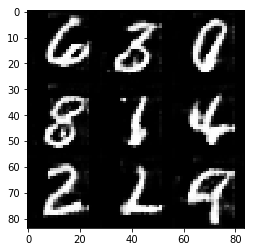

Epoch 2/2... Discriminator Loss: 1.2733... Generator Loss: 0.8133
Epoch 2/2... Discriminator Loss: 1.6068... Generator Loss: 0.4161
Epoch 2/2... Discriminator Loss: 1.6222... Generator Loss: 0.3986
Epoch 2/2... Discriminator Loss: 1.7054... Generator Loss: 0.3247
Epoch 2/2... Discriminator Loss: 1.8087... Generator Loss: 0.2881
Epoch 2/2... Discriminator Loss: 1.6105... Generator Loss: 0.4065
Epoch 2/2... Discriminator Loss: 1.5730... Generator Loss: 0.7769


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5
alpha = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode, alpha = alpha)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 7.6335... Generator Loss: 0.0008
Epoch 1/1... Discriminator Loss: 5.6679... Generator Loss: 0.0050
Epoch 1/1... Discriminator Loss: 5.3181... Generator Loss: 0.0074
Epoch 1/1... Discriminator Loss: 4.7088... Generator Loss: 0.0131
Epoch 1/1... Discriminator Loss: 4.2881... Generator Loss: 0.0202
Epoch 1/1... Discriminator Loss: 4.2464... Generator Loss: 0.0221
Epoch 1/1... Discriminator Loss: 4.2413... Generator Loss: 0.0280
Epoch 1/1... Discriminator Loss: 3.4753... Generator Loss: 0.0466
Epoch 1/1... Discriminator Loss: 3.4027... Generator Loss: 0.0494
Epoch 1/1... Discriminator Loss: 3.4677... Generator Loss: 0.0481


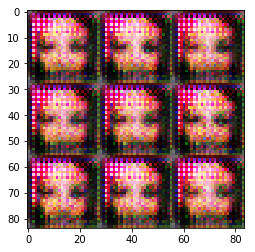

Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 0.6002
Epoch 1/1... Discriminator Loss: 1.9146... Generator Loss: 0.2686
Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 2.1553
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.6228
Epoch 1/1... Discriminator Loss: 0.8352... Generator Loss: 1.0796
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.5832
Epoch 1/1... Discriminator Loss: 0.4142... Generator Loss: 3.1670
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 0.4952... Generator Loss: 6.7222


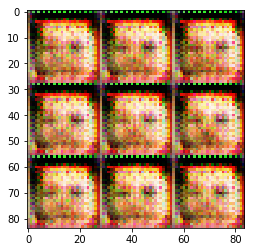

Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.4813
Epoch 1/1... Discriminator Loss: 0.4440... Generator Loss: 2.7149
Epoch 1/1... Discriminator Loss: 0.6466... Generator Loss: 1.5358
Epoch 1/1... Discriminator Loss: 0.7131... Generator Loss: 1.4017
Epoch 1/1... Discriminator Loss: 0.6948... Generator Loss: 1.3837
Epoch 1/1... Discriminator Loss: 0.7366... Generator Loss: 1.7432
Epoch 1/1... Discriminator Loss: 0.4719... Generator Loss: 2.2243
Epoch 1/1... Discriminator Loss: 0.4759... Generator Loss: 2.4015
Epoch 1/1... Discriminator Loss: 0.9121... Generator Loss: 0.9694
Epoch 1/1... Discriminator Loss: 0.5356... Generator Loss: 2.6277


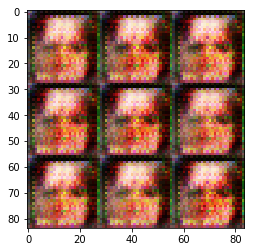

Epoch 1/1... Discriminator Loss: 0.5708... Generator Loss: 2.0414
Epoch 1/1... Discriminator Loss: 0.5239... Generator Loss: 2.1087
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 0.6532... Generator Loss: 1.4664
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.5826... Generator Loss: 0.4597
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.6213
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 1.0026
Epoch 1/1... Discriminator Loss: 0.9800... Generator Loss: 1.4655
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.8709


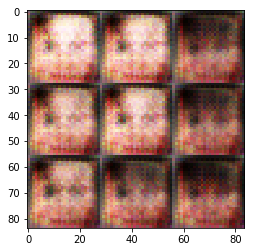

Epoch 1/1... Discriminator Loss: 1.5620... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 1.8400... Generator Loss: 0.3147
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.5198... Generator Loss: 0.4243
Epoch 1/1... Discriminator Loss: 1.2942... Generator Loss: 1.0058
Epoch 1/1... Discriminator Loss: 1.0024... Generator Loss: 0.9280
Epoch 1/1... Discriminator Loss: 1.4822... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 2.5856... Generator Loss: 0.1334


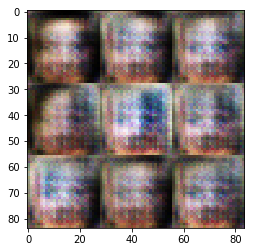

Epoch 1/1... Discriminator Loss: 1.6545... Generator Loss: 0.4729
Epoch 1/1... Discriminator Loss: 1.6914... Generator Loss: 0.3526
Epoch 1/1... Discriminator Loss: 2.0227... Generator Loss: 0.3565
Epoch 1/1... Discriminator Loss: 2.0775... Generator Loss: 0.2167
Epoch 1/1... Discriminator Loss: 1.8010... Generator Loss: 0.3813
Epoch 1/1... Discriminator Loss: 2.1108... Generator Loss: 0.2905
Epoch 1/1... Discriminator Loss: 1.6113... Generator Loss: 0.3958
Epoch 1/1... Discriminator Loss: 1.8456... Generator Loss: 0.4510
Epoch 1/1... Discriminator Loss: 2.1082... Generator Loss: 0.2892
Epoch 1/1... Discriminator Loss: 1.4636... Generator Loss: 0.4343


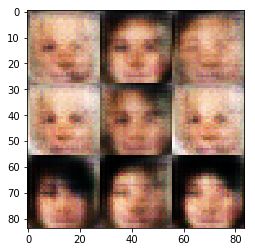

Epoch 1/1... Discriminator Loss: 1.6223... Generator Loss: 0.4598
Epoch 1/1... Discriminator Loss: 1.8596... Generator Loss: 0.3660
Epoch 1/1... Discriminator Loss: 2.1384... Generator Loss: 0.3008
Epoch 1/1... Discriminator Loss: 1.7778... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.7746... Generator Loss: 0.4402
Epoch 1/1... Discriminator Loss: 1.7794... Generator Loss: 0.3811
Epoch 1/1... Discriminator Loss: 1.8575... Generator Loss: 0.3538
Epoch 1/1... Discriminator Loss: 1.4393... Generator Loss: 0.4777
Epoch 1/1... Discriminator Loss: 2.1055... Generator Loss: 0.3148
Epoch 1/1... Discriminator Loss: 1.2535... Generator Loss: 0.9933


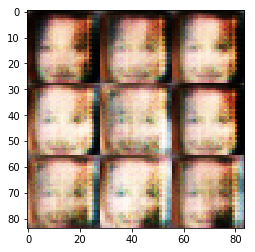

Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.1953... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.8630... Generator Loss: 0.2689
Epoch 1/1... Discriminator Loss: 2.4366... Generator Loss: 0.1467
Epoch 1/1... Discriminator Loss: 2.5293... Generator Loss: 0.1656
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.4964
Epoch 1/1... Discriminator Loss: 1.9579... Generator Loss: 0.3311
Epoch 1/1... Discriminator Loss: 1.8177... Generator Loss: 0.5045
Epoch 1/1... Discriminator Loss: 1.5971... Generator Loss: 0.5217
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.5682


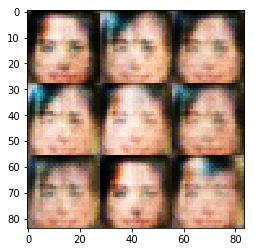

Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 1.0397
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.4467
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 1.8676... Generator Loss: 0.2903
Epoch 1/1... Discriminator Loss: 1.5643... Generator Loss: 0.4310
Epoch 1/1... Discriminator Loss: 1.2423... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.7938... Generator Loss: 0.4590
Epoch 1/1... Discriminator Loss: 1.7944... Generator Loss: 0.5896
Epoch 1/1... Discriminator Loss: 2.1927... Generator Loss: 0.2306
Epoch 1/1... Discriminator Loss: 1.7275... Generator Loss: 0.4072


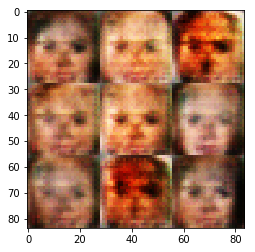

Epoch 1/1... Discriminator Loss: 1.7160... Generator Loss: 0.3750
Epoch 1/1... Discriminator Loss: 1.8453... Generator Loss: 0.3228
Epoch 1/1... Discriminator Loss: 1.4432... Generator Loss: 1.2154
Epoch 1/1... Discriminator Loss: 2.4379... Generator Loss: 0.1417
Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 1.3792
Epoch 1/1... Discriminator Loss: 1.5551... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.2317... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.7718... Generator Loss: 0.3908
Epoch 1/1... Discriminator Loss: 1.7689... Generator Loss: 0.5591
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.6889


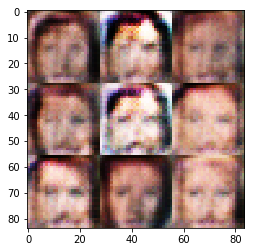

Epoch 1/1... Discriminator Loss: 2.0482... Generator Loss: 0.3109
Epoch 1/1... Discriminator Loss: 1.9823... Generator Loss: 0.2394
Epoch 1/1... Discriminator Loss: 2.0219... Generator Loss: 0.2665
Epoch 1/1... Discriminator Loss: 1.2660... Generator Loss: 1.1762
Epoch 1/1... Discriminator Loss: 1.9893... Generator Loss: 0.2760
Epoch 1/1... Discriminator Loss: 2.3604... Generator Loss: 0.1852
Epoch 1/1... Discriminator Loss: 2.0401... Generator Loss: 0.2466
Epoch 1/1... Discriminator Loss: 1.7755... Generator Loss: 0.4044
Epoch 1/1... Discriminator Loss: 1.9863... Generator Loss: 0.2575
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.5995


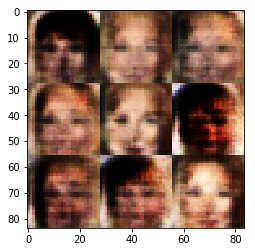

Epoch 1/1... Discriminator Loss: 1.0731... Generator Loss: 1.4678
Epoch 1/1... Discriminator Loss: 2.0321... Generator Loss: 0.2796
Epoch 1/1... Discriminator Loss: 1.8523... Generator Loss: 0.3271
Epoch 1/1... Discriminator Loss: 2.1472... Generator Loss: 0.2590
Epoch 1/1... Discriminator Loss: 1.9239... Generator Loss: 0.2473
Epoch 1/1... Discriminator Loss: 1.8969... Generator Loss: 0.3166
Epoch 1/1... Discriminator Loss: 1.6039... Generator Loss: 0.4142
Epoch 1/1... Discriminator Loss: 2.3635... Generator Loss: 0.1736
Epoch 1/1... Discriminator Loss: 1.5448... Generator Loss: 0.4369
Epoch 1/1... Discriminator Loss: 1.9732... Generator Loss: 0.2410


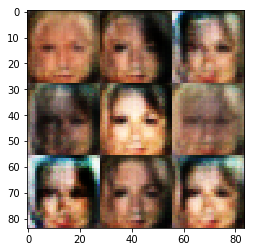

Epoch 1/1... Discriminator Loss: 2.0141... Generator Loss: 0.2462
Epoch 1/1... Discriminator Loss: 1.9522... Generator Loss: 0.2401
Epoch 1/1... Discriminator Loss: 1.6668... Generator Loss: 0.8265
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 0.9268
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.4476
Epoch 1/1... Discriminator Loss: 1.9091... Generator Loss: 0.2534
Epoch 1/1... Discriminator Loss: 1.5878... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.7433... Generator Loss: 0.3953
Epoch 1/1... Discriminator Loss: 1.6023... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.4858... Generator Loss: 0.5284


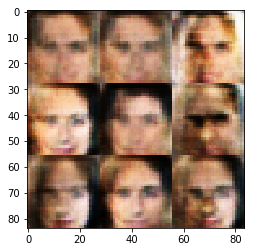

Epoch 1/1... Discriminator Loss: 1.7114... Generator Loss: 0.4870
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.5326
Epoch 1/1... Discriminator Loss: 2.2238... Generator Loss: 0.1817
Epoch 1/1... Discriminator Loss: 1.7915... Generator Loss: 0.4438
Epoch 1/1... Discriminator Loss: 0.9481... Generator Loss: 1.3135
Epoch 1/1... Discriminator Loss: 1.6897... Generator Loss: 0.3779
Epoch 1/1... Discriminator Loss: 1.9515... Generator Loss: 0.2904
Epoch 1/1... Discriminator Loss: 1.3598... Generator Loss: 0.5171
Epoch 1/1... Discriminator Loss: 1.9541... Generator Loss: 0.3409
Epoch 1/1... Discriminator Loss: 1.1622... Generator Loss: 0.7893


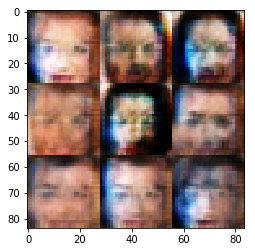

Epoch 1/1... Discriminator Loss: 1.8738... Generator Loss: 0.3297
Epoch 1/1... Discriminator Loss: 1.7024... Generator Loss: 0.3802
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 1.2759
Epoch 1/1... Discriminator Loss: 2.2545... Generator Loss: 0.2373
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.5489
Epoch 1/1... Discriminator Loss: 0.6659... Generator Loss: 1.6976
Epoch 1/1... Discriminator Loss: 1.2892... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 2.3389... Generator Loss: 0.1833
Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 1.0591
Epoch 1/1... Discriminator Loss: 2.3591... Generator Loss: 0.2340


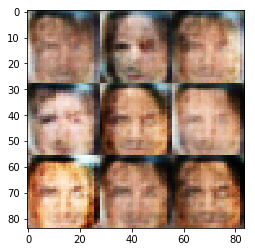

Epoch 1/1... Discriminator Loss: 1.5376... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 3.0907
Epoch 1/1... Discriminator Loss: 1.9822... Generator Loss: 0.2430
Epoch 1/1... Discriminator Loss: 1.6853... Generator Loss: 0.3309
Epoch 1/1... Discriminator Loss: 1.4740... Generator Loss: 0.4264
Epoch 1/1... Discriminator Loss: 1.7096... Generator Loss: 0.3669
Epoch 1/1... Discriminator Loss: 1.4790... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 0.4363
Epoch 1/1... Discriminator Loss: 1.5524... Generator Loss: 0.5074
Epoch 1/1... Discriminator Loss: 1.5828... Generator Loss: 0.5284


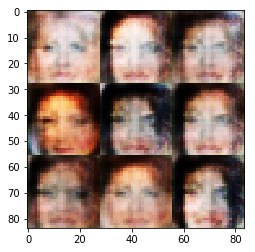

Epoch 1/1... Discriminator Loss: 2.2117... Generator Loss: 0.2010
Epoch 1/1... Discriminator Loss: 1.5992... Generator Loss: 0.5213
Epoch 1/1... Discriminator Loss: 1.8278... Generator Loss: 0.3011
Epoch 1/1... Discriminator Loss: 1.6118... Generator Loss: 0.4219
Epoch 1/1... Discriminator Loss: 1.5512... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.9448
Epoch 1/1... Discriminator Loss: 2.1424... Generator Loss: 0.2187
Epoch 1/1... Discriminator Loss: 1.4688... Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.8485... Generator Loss: 0.3504
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 0.9095


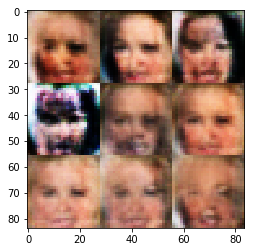

Epoch 1/1... Discriminator Loss: 1.5972... Generator Loss: 0.5929
Epoch 1/1... Discriminator Loss: 2.0445... Generator Loss: 0.2402
Epoch 1/1... Discriminator Loss: 1.9808... Generator Loss: 0.2795
Epoch 1/1... Discriminator Loss: 2.2224... Generator Loss: 0.1994
Epoch 1/1... Discriminator Loss: 2.0958... Generator Loss: 0.2282
Epoch 1/1... Discriminator Loss: 1.4055... Generator Loss: 0.5381
Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 1.9603... Generator Loss: 0.2425
Epoch 1/1... Discriminator Loss: 1.5878... Generator Loss: 0.3966
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 1.6145


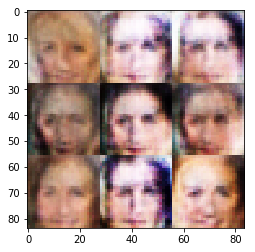

Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.7697
Epoch 1/1... Discriminator Loss: 2.0456... Generator Loss: 0.2161
Epoch 1/1... Discriminator Loss: 1.8023... Generator Loss: 0.3457
Epoch 1/1... Discriminator Loss: 1.6346... Generator Loss: 0.4026
Epoch 1/1... Discriminator Loss: 1.4999... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 2.0825... Generator Loss: 0.2361
Epoch 1/1... Discriminator Loss: 1.6142... Generator Loss: 0.5666
Epoch 1/1... Discriminator Loss: 2.2037... Generator Loss: 0.1732
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.9379
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.4804


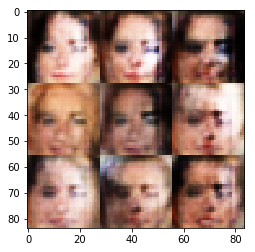

Epoch 1/1... Discriminator Loss: 1.6645... Generator Loss: 0.4279
Epoch 1/1... Discriminator Loss: 1.9603... Generator Loss: 0.3463
Epoch 1/1... Discriminator Loss: 2.2215... Generator Loss: 0.2063
Epoch 1/1... Discriminator Loss: 1.9009... Generator Loss: 0.2709
Epoch 1/1... Discriminator Loss: 1.6130... Generator Loss: 0.3630
Epoch 1/1... Discriminator Loss: 2.1869... Generator Loss: 0.2033
Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.7745... Generator Loss: 0.3010
Epoch 1/1... Discriminator Loss: 1.8220... Generator Loss: 0.3777
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.6653


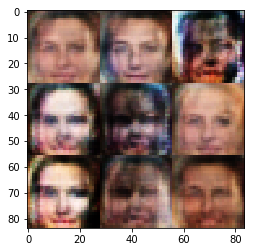

Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.5600
Epoch 1/1... Discriminator Loss: 2.2381... Generator Loss: 0.1625
Epoch 1/1... Discriminator Loss: 1.1437... Generator Loss: 1.0426
Epoch 1/1... Discriminator Loss: 1.5624... Generator Loss: 0.4438
Epoch 1/1... Discriminator Loss: 1.6449... Generator Loss: 0.4010
Epoch 1/1... Discriminator Loss: 1.8823... Generator Loss: 0.2509
Epoch 1/1... Discriminator Loss: 1.9595... Generator Loss: 0.2537
Epoch 1/1... Discriminator Loss: 1.1838... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.5139


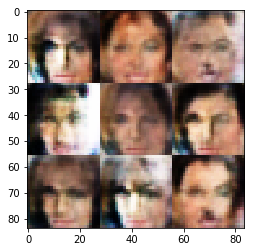

Epoch 1/1... Discriminator Loss: 1.7528... Generator Loss: 0.5107
Epoch 1/1... Discriminator Loss: 2.1753... Generator Loss: 0.1983
Epoch 1/1... Discriminator Loss: 1.8808... Generator Loss: 0.2965
Epoch 1/1... Discriminator Loss: 1.6046... Generator Loss: 0.3779
Epoch 1/1... Discriminator Loss: 2.0832... Generator Loss: 0.2257
Epoch 1/1... Discriminator Loss: 1.7979... Generator Loss: 0.2917
Epoch 1/1... Discriminator Loss: 2.0684... Generator Loss: 0.2138
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.8882... Generator Loss: 0.3272
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 1.0393


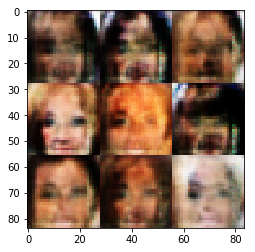

Epoch 1/1... Discriminator Loss: 1.6172... Generator Loss: 0.4358
Epoch 1/1... Discriminator Loss: 2.2259... Generator Loss: 0.1838
Epoch 1/1... Discriminator Loss: 1.6526... Generator Loss: 0.3459
Epoch 1/1... Discriminator Loss: 1.9226... Generator Loss: 0.2365
Epoch 1/1... Discriminator Loss: 2.0269... Generator Loss: 0.2944
Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 0.9214
Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 2.1656... Generator Loss: 0.2201


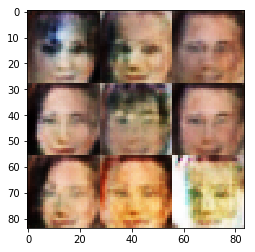

Epoch 1/1... Discriminator Loss: 2.5408... Generator Loss: 0.1567
Epoch 1/1... Discriminator Loss: 2.3400... Generator Loss: 0.1454
Epoch 1/1... Discriminator Loss: 1.9029... Generator Loss: 0.2421
Epoch 1/1... Discriminator Loss: 2.0108... Generator Loss: 0.2183
Epoch 1/1... Discriminator Loss: 1.8419... Generator Loss: 0.4195
Epoch 1/1... Discriminator Loss: 2.2646... Generator Loss: 0.1596
Epoch 1/1... Discriminator Loss: 0.8016... Generator Loss: 1.7198
Epoch 1/1... Discriminator Loss: 2.3503... Generator Loss: 0.1652
Epoch 1/1... Discriminator Loss: 1.1730... Generator Loss: 1.0443
Epoch 1/1... Discriminator Loss: 1.6249... Generator Loss: 0.9627


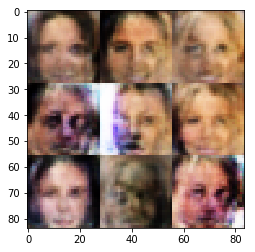

Epoch 1/1... Discriminator Loss: 2.0129... Generator Loss: 0.2238
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.4634
Epoch 1/1... Discriminator Loss: 2.0327... Generator Loss: 0.2300
Epoch 1/1... Discriminator Loss: 2.4261... Generator Loss: 0.1360
Epoch 1/1... Discriminator Loss: 1.7180... Generator Loss: 0.3750
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 1.8145
Epoch 1/1... Discriminator Loss: 1.5847... Generator Loss: 0.3869
Epoch 1/1... Discriminator Loss: 0.8981... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.8913... Generator Loss: 0.2788
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 1.1763


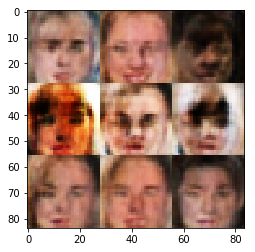

Epoch 1/1... Discriminator Loss: 1.5368... Generator Loss: 0.9026
Epoch 1/1... Discriminator Loss: 1.5754... Generator Loss: 1.6050
Epoch 1/1... Discriminator Loss: 1.4665... Generator Loss: 0.4804
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 2.4089
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 1.2397
Epoch 1/1... Discriminator Loss: 2.1655... Generator Loss: 0.2236
Epoch 1/1... Discriminator Loss: 1.6654... Generator Loss: 0.3776
Epoch 1/1... Discriminator Loss: 1.9710... Generator Loss: 0.2165
Epoch 1/1... Discriminator Loss: 1.0723... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 2.0165... Generator Loss: 0.2280


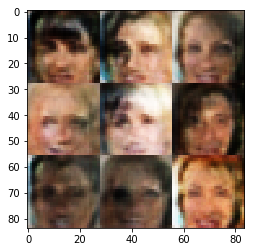

Epoch 1/1... Discriminator Loss: 1.5382... Generator Loss: 0.5242
Epoch 1/1... Discriminator Loss: 1.9780... Generator Loss: 0.2397
Epoch 1/1... Discriminator Loss: 2.1222... Generator Loss: 0.1989
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 1.5439... Generator Loss: 0.4834
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 2.1102... Generator Loss: 0.2045
Epoch 1/1... Discriminator Loss: 0.9950... Generator Loss: 1.2007
Epoch 1/1... Discriminator Loss: 1.7351... Generator Loss: 0.3061
Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.5468


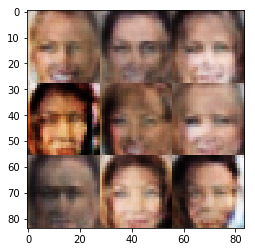

Epoch 1/1... Discriminator Loss: 1.4713... Generator Loss: 0.4173
Epoch 1/1... Discriminator Loss: 1.4419... Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 1.4252
Epoch 1/1... Discriminator Loss: 1.0449... Generator Loss: 1.9559
Epoch 1/1... Discriminator Loss: 1.5747... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.6453... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.5739... Generator Loss: 0.3849
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.7773... Generator Loss: 0.3302
Epoch 1/1... Discriminator Loss: 2.2971... Generator Loss: 0.1612


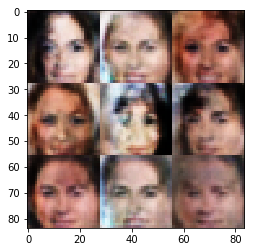

Epoch 1/1... Discriminator Loss: 2.1609... Generator Loss: 0.1930
Epoch 1/1... Discriminator Loss: 2.0032... Generator Loss: 0.2263
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 0.8876... Generator Loss: 1.4883
Epoch 1/1... Discriminator Loss: 2.3106... Generator Loss: 0.1593
Epoch 1/1... Discriminator Loss: 0.4940... Generator Loss: 2.5070
Epoch 1/1... Discriminator Loss: 0.9999... Generator Loss: 1.2303
Epoch 1/1... Discriminator Loss: 2.3378... Generator Loss: 0.1564
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.8611
Epoch 1/1... Discriminator Loss: 1.6942... Generator Loss: 0.3125


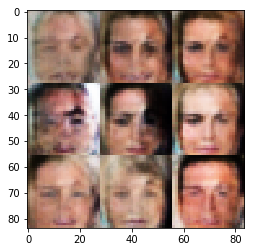

Epoch 1/1... Discriminator Loss: 0.9280... Generator Loss: 1.3828
Epoch 1/1... Discriminator Loss: 2.9353... Generator Loss: 0.0842
Epoch 1/1... Discriminator Loss: 0.9047... Generator Loss: 0.9378
Epoch 1/1... Discriminator Loss: 1.7309... Generator Loss: 0.3141
Epoch 1/1... Discriminator Loss: 1.0966... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 0.5466... Generator Loss: 2.2820
Epoch 1/1... Discriminator Loss: 2.0445... Generator Loss: 0.2508
Epoch 1/1... Discriminator Loss: 2.0716... Generator Loss: 0.2312
Epoch 1/1... Discriminator Loss: 2.8932... Generator Loss: 0.0869
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 0.7271


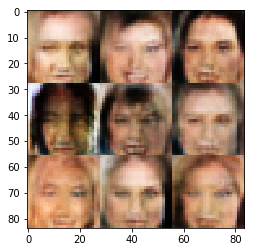

Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 2.1647
Epoch 1/1... Discriminator Loss: 1.5584... Generator Loss: 0.3680
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.6136
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.5073
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 1.0833
Epoch 1/1... Discriminator Loss: 0.8802... Generator Loss: 3.5673
Epoch 1/1... Discriminator Loss: 0.8344... Generator Loss: 1.1624
Epoch 1/1... Discriminator Loss: 2.2182... Generator Loss: 0.1969
Epoch 1/1... Discriminator Loss: 1.9745... Generator Loss: 0.3194
Epoch 1/1... Discriminator Loss: 2.3603... Generator Loss: 0.1529


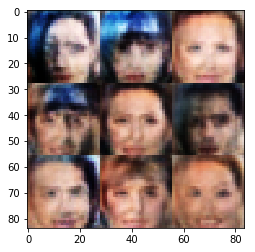

Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 0.8575
Epoch 1/1... Discriminator Loss: 2.8412... Generator Loss: 0.0952
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 0.8617... Generator Loss: 0.9771
Epoch 1/1... Discriminator Loss: 1.9996... Generator Loss: 0.2156
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.5657
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 0.8231
Epoch 1/1... Discriminator Loss: 1.9443... Generator Loss: 0.3049
Epoch 1/1... Discriminator Loss: 1.0538... Generator Loss: 1.5320
Epoch 1/1... Discriminator Loss: 1.5168... Generator Loss: 0.4903


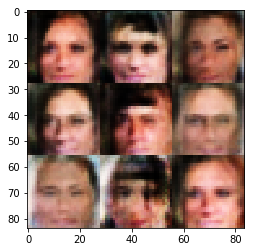

Epoch 1/1... Discriminator Loss: 2.2713... Generator Loss: 0.1669
Epoch 1/1... Discriminator Loss: 1.0365... Generator Loss: 2.0973
Epoch 1/1... Discriminator Loss: 1.5488... Generator Loss: 0.3870
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.2750
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 1.0297
Epoch 1/1... Discriminator Loss: 1.6006... Generator Loss: 0.4067
Epoch 1/1... Discriminator Loss: 1.8244... Generator Loss: 0.3172
Epoch 1/1... Discriminator Loss: 0.9179... Generator Loss: 1.5213
Epoch 1/1... Discriminator Loss: 2.2514... Generator Loss: 0.1916
Epoch 1/1... Discriminator Loss: 2.3499... Generator Loss: 0.1471


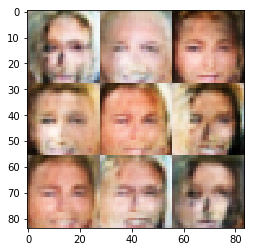

Epoch 1/1... Discriminator Loss: 2.0034... Generator Loss: 0.2238
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.6270
Epoch 1/1... Discriminator Loss: 2.1775... Generator Loss: 0.1972
Epoch 1/1... Discriminator Loss: 2.2534... Generator Loss: 0.1639
Epoch 1/1... Discriminator Loss: 1.5583... Generator Loss: 0.4462
Epoch 1/1... Discriminator Loss: 0.9986... Generator Loss: 1.3258
Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.4875
Epoch 1/1... Discriminator Loss: 2.4862... Generator Loss: 0.1559
Epoch 1/1... Discriminator Loss: 1.7805... Generator Loss: 0.3302


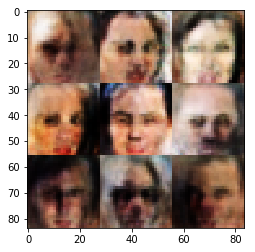

Epoch 1/1... Discriminator Loss: 1.0152... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 0.7835... Generator Loss: 1.2122
Epoch 1/1... Discriminator Loss: 1.1114... Generator Loss: 1.7204
Epoch 1/1... Discriminator Loss: 2.2174... Generator Loss: 0.1695
Epoch 1/1... Discriminator Loss: 2.0623... Generator Loss: 0.2127
Epoch 1/1... Discriminator Loss: 2.3704... Generator Loss: 0.1545
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.5457
Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 0.4298
Epoch 1/1... Discriminator Loss: 0.9934... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.6656... Generator Loss: 0.3225


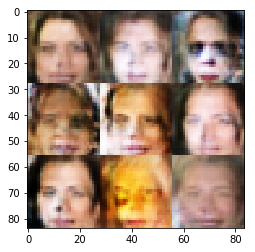

Epoch 1/1... Discriminator Loss: 1.5552... Generator Loss: 0.3579
Epoch 1/1... Discriminator Loss: 1.7121... Generator Loss: 0.3060
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 2.3799... Generator Loss: 0.1476
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.5751
Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 2.0655... Generator Loss: 0.2640
Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 1.0424
Epoch 1/1... Discriminator Loss: 1.5647... Generator Loss: 0.4885
Epoch 1/1... Discriminator Loss: 1.5515... Generator Loss: 0.4343


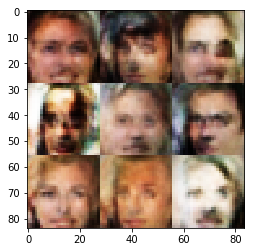

Epoch 1/1... Discriminator Loss: 1.6937... Generator Loss: 0.3549
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 0.8336
Epoch 1/1... Discriminator Loss: 1.0010... Generator Loss: 2.1007
Epoch 1/1... Discriminator Loss: 2.2582... Generator Loss: 0.1753
Epoch 1/1... Discriminator Loss: 2.1558... Generator Loss: 0.2007
Epoch 1/1... Discriminator Loss: 1.1850... Generator Loss: 1.3387
Epoch 1/1... Discriminator Loss: 1.2011... Generator Loss: 0.9608
Epoch 1/1... Discriminator Loss: 1.8622... Generator Loss: 0.2835
Epoch 1/1... Discriminator Loss: 2.2723... Generator Loss: 0.1865
Epoch 1/1... Discriminator Loss: 2.3943... Generator Loss: 0.1522


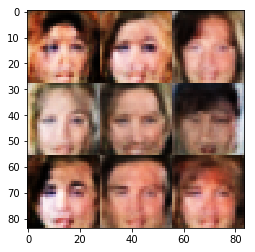

Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.4788
Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 1.4285
Epoch 1/1... Discriminator Loss: 2.5284... Generator Loss: 0.1205
Epoch 1/1... Discriminator Loss: 1.6992... Generator Loss: 0.3824
Epoch 1/1... Discriminator Loss: 2.4118... Generator Loss: 0.1395
Epoch 1/1... Discriminator Loss: 2.8004... Generator Loss: 0.0967
Epoch 1/1... Discriminator Loss: 2.1773... Generator Loss: 0.1846
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 2.0821... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 1.5604... Generator Loss: 0.5203


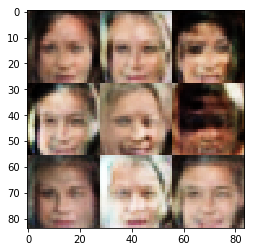

Epoch 1/1... Discriminator Loss: 0.9456... Generator Loss: 1.4481
Epoch 1/1... Discriminator Loss: 1.0371... Generator Loss: 0.8319
Epoch 1/1... Discriminator Loss: 1.7676... Generator Loss: 0.2937
Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 1.2421
Epoch 1/1... Discriminator Loss: 2.6261... Generator Loss: 0.1492
Epoch 1/1... Discriminator Loss: 2.5365... Generator Loss: 0.1208
Epoch 1/1... Discriminator Loss: 2.0031... Generator Loss: 0.2222
Epoch 1/1... Discriminator Loss: 1.0905... Generator Loss: 0.9570
Epoch 1/1... Discriminator Loss: 1.0789... Generator Loss: 1.7561
Epoch 1/1... Discriminator Loss: 2.4500... Generator Loss: 0.1480


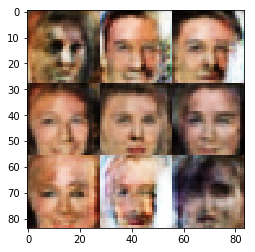

Epoch 1/1... Discriminator Loss: 0.8082... Generator Loss: 1.0277
Epoch 1/1... Discriminator Loss: 1.9706... Generator Loss: 0.2607
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 0.8405
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 2.3802
Epoch 1/1... Discriminator Loss: 1.3409... Generator Loss: 1.4268
Epoch 1/1... Discriminator Loss: 0.7523... Generator Loss: 1.4135
Epoch 1/1... Discriminator Loss: 0.8267... Generator Loss: 1.4140
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.6057
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.6110
Epoch 1/1... Discriminator Loss: 1.1885... Generator Loss: 0.6282


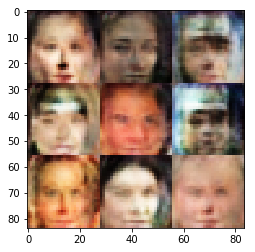

Epoch 1/1... Discriminator Loss: 1.9407... Generator Loss: 0.2448
Epoch 1/1... Discriminator Loss: 2.0804... Generator Loss: 0.2121
Epoch 1/1... Discriminator Loss: 1.9215... Generator Loss: 0.2514
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 1.2065
Epoch 1/1... Discriminator Loss: 0.9994... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.7921... Generator Loss: 0.2875
Epoch 1/1... Discriminator Loss: 2.3817... Generator Loss: 0.1448
Epoch 1/1... Discriminator Loss: 0.6758... Generator Loss: 2.1457
Epoch 1/1... Discriminator Loss: 0.9810... Generator Loss: 2.1330
Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 0.7116


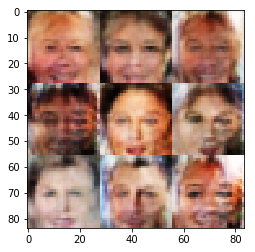

Epoch 1/1... Discriminator Loss: 1.9863... Generator Loss: 0.2500
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 2.6094
Epoch 1/1... Discriminator Loss: 2.1720... Generator Loss: 0.1851
Epoch 1/1... Discriminator Loss: 2.1878... Generator Loss: 0.1819
Epoch 1/1... Discriminator Loss: 1.7767... Generator Loss: 0.2933
Epoch 1/1... Discriminator Loss: 0.7584... Generator Loss: 1.7686
Epoch 1/1... Discriminator Loss: 1.7454... Generator Loss: 0.3255
Epoch 1/1... Discriminator Loss: 1.2997... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 1.7324... Generator Loss: 0.3204
Epoch 1/1... Discriminator Loss: 0.9394... Generator Loss: 1.2749


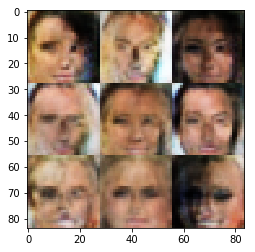

Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 0.6448... Generator Loss: 1.6437
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 1.4802
Epoch 1/1... Discriminator Loss: 1.6061... Generator Loss: 0.3709
Epoch 1/1... Discriminator Loss: 2.6710... Generator Loss: 0.1243
Epoch 1/1... Discriminator Loss: 1.1607... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 2.4170... Generator Loss: 0.1534
Epoch 1/1... Discriminator Loss: 1.9266... Generator Loss: 0.2417
Epoch 1/1... Discriminator Loss: 2.5921... Generator Loss: 0.1160
Epoch 1/1... Discriminator Loss: 2.3705... Generator Loss: 0.1406


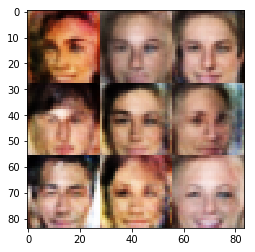

Epoch 1/1... Discriminator Loss: 2.4602... Generator Loss: 0.1392
Epoch 1/1... Discriminator Loss: 0.9892... Generator Loss: 1.6750
Epoch 1/1... Discriminator Loss: 1.0484... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 1.2272
Epoch 1/1... Discriminator Loss: 0.8545... Generator Loss: 1.1979
Epoch 1/1... Discriminator Loss: 0.8973... Generator Loss: 1.4388
Epoch 1/1... Discriminator Loss: 2.0902... Generator Loss: 0.2004
Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 3.0431
Epoch 1/1... Discriminator Loss: 1.5100... Generator Loss: 0.4078
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.9814


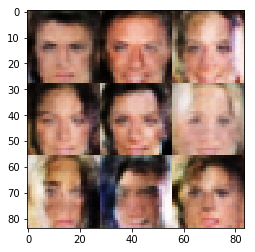

Epoch 1/1... Discriminator Loss: 1.1079... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 2.1075... Generator Loss: 0.2231
Epoch 1/1... Discriminator Loss: 1.2087... Generator Loss: 3.3114
Epoch 1/1... Discriminator Loss: 1.7594... Generator Loss: 0.3122
Epoch 1/1... Discriminator Loss: 2.1458... Generator Loss: 0.1871
Epoch 1/1... Discriminator Loss: 1.6035... Generator Loss: 0.3497
Epoch 1/1... Discriminator Loss: 0.5864... Generator Loss: 4.8446
Epoch 1/1... Discriminator Loss: 0.5514... Generator Loss: 2.3290
Epoch 1/1... Discriminator Loss: 1.5598... Generator Loss: 0.3778
Epoch 1/1... Discriminator Loss: 2.3582... Generator Loss: 0.1557


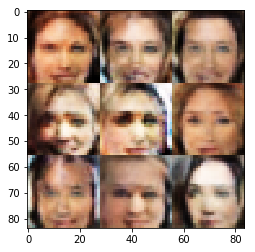

Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.4656
Epoch 1/1... Discriminator Loss: 1.6802... Generator Loss: 0.3867
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 0.4973... Generator Loss: 2.1790
Epoch 1/1... Discriminator Loss: 1.1453... Generator Loss: 0.8964
Epoch 1/1... Discriminator Loss: 0.7465... Generator Loss: 1.6855
Epoch 1/1... Discriminator Loss: 1.8063... Generator Loss: 0.2894
Epoch 1/1... Discriminator Loss: 1.7082... Generator Loss: 0.3510
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.6719... Generator Loss: 0.3540


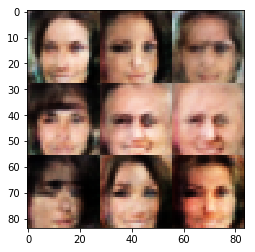

Epoch 1/1... Discriminator Loss: 2.1244... Generator Loss: 0.2009
Epoch 1/1... Discriminator Loss: 0.7747... Generator Loss: 1.7618
Epoch 1/1... Discriminator Loss: 1.8897... Generator Loss: 0.2393
Epoch 1/1... Discriminator Loss: 1.2480... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.5486... Generator Loss: 0.4588
Epoch 1/1... Discriminator Loss: 1.7727... Generator Loss: 0.2826
Epoch 1/1... Discriminator Loss: 2.4282... Generator Loss: 0.1402
Epoch 1/1... Discriminator Loss: 1.8718... Generator Loss: 0.2484
Epoch 1/1... Discriminator Loss: 1.9309... Generator Loss: 0.2327


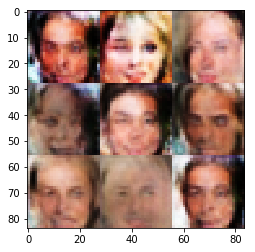

Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 1.0824
Epoch 1/1... Discriminator Loss: 0.9820... Generator Loss: 0.8479
Epoch 1/1... Discriminator Loss: 0.7626... Generator Loss: 2.9685
Epoch 1/1... Discriminator Loss: 1.7464... Generator Loss: 0.2945
Epoch 1/1... Discriminator Loss: 0.7765... Generator Loss: 1.4950
Epoch 1/1... Discriminator Loss: 2.4401... Generator Loss: 0.1392
Epoch 1/1... Discriminator Loss: 2.1182... Generator Loss: 0.1901
Epoch 1/1... Discriminator Loss: 0.7959... Generator Loss: 1.6388
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.4974
Epoch 1/1... Discriminator Loss: 1.9612... Generator Loss: 0.2945


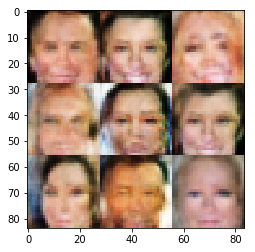

Epoch 1/1... Discriminator Loss: 2.0867... Generator Loss: 0.2114
Epoch 1/1... Discriminator Loss: 2.1799... Generator Loss: 0.2092
Epoch 1/1... Discriminator Loss: 1.7894... Generator Loss: 0.3061
Epoch 1/1... Discriminator Loss: 2.7485... Generator Loss: 0.0974
Epoch 1/1... Discriminator Loss: 2.1266... Generator Loss: 0.2363
Epoch 1/1... Discriminator Loss: 0.9014... Generator Loss: 1.3851
Epoch 1/1... Discriminator Loss: 2.3253... Generator Loss: 0.1547
Epoch 1/1... Discriminator Loss: 2.3180... Generator Loss: 0.1649
Epoch 1/1... Discriminator Loss: 0.6638... Generator Loss: 1.7709
Epoch 1/1... Discriminator Loss: 0.9822... Generator Loss: 1.6435


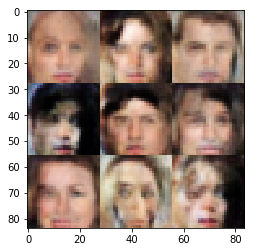

Epoch 1/1... Discriminator Loss: 3.0715... Generator Loss: 0.0730
Epoch 1/1... Discriminator Loss: 2.1102... Generator Loss: 0.2223
Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 0.6963... Generator Loss: 2.1425
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 0.4380
Epoch 1/1... Discriminator Loss: 1.6648... Generator Loss: 0.3411
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 0.6279
Epoch 1/1... Discriminator Loss: 2.4767... Generator Loss: 0.1353
Epoch 1/1... Discriminator Loss: 0.9422... Generator Loss: 0.9333
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 1.9671


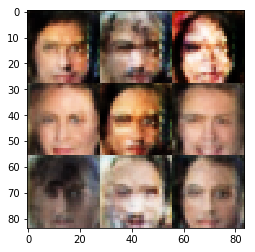

Epoch 1/1... Discriminator Loss: 1.5383... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 1.7506... Generator Loss: 0.3935
Epoch 1/1... Discriminator Loss: 0.6043... Generator Loss: 1.7138
Epoch 1/1... Discriminator Loss: 2.4929... Generator Loss: 0.1315
Epoch 1/1... Discriminator Loss: 0.7183... Generator Loss: 1.2321
Epoch 1/1... Discriminator Loss: 2.0321... Generator Loss: 0.2318
Epoch 1/1... Discriminator Loss: 2.1526... Generator Loss: 0.1887
Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 1.3818
Epoch 1/1... Discriminator Loss: 2.0413... Generator Loss: 0.2108
Epoch 1/1... Discriminator Loss: 2.5779... Generator Loss: 0.1320


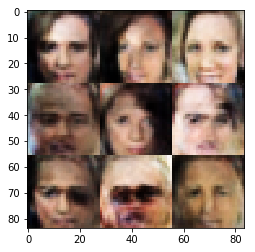

Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 2.2421... Generator Loss: 0.1935
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 0.8482
Epoch 1/1... Discriminator Loss: 1.8771... Generator Loss: 0.2839
Epoch 1/1... Discriminator Loss: 2.4209... Generator Loss: 0.1363
Epoch 1/1... Discriminator Loss: 0.6033... Generator Loss: 1.7745
Epoch 1/1... Discriminator Loss: 2.4308... Generator Loss: 0.1483
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.5801
Epoch 1/1... Discriminator Loss: 1.6571... Generator Loss: 0.4274
Epoch 1/1... Discriminator Loss: 1.9357... Generator Loss: 0.3194


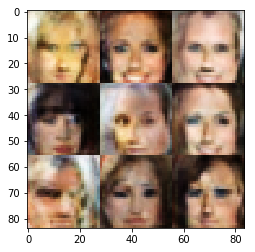

Epoch 1/1... Discriminator Loss: 1.9558... Generator Loss: 0.2281
Epoch 1/1... Discriminator Loss: 2.5916... Generator Loss: 0.1303
Epoch 1/1... Discriminator Loss: 2.5456... Generator Loss: 0.1291
Epoch 1/1... Discriminator Loss: 0.7793... Generator Loss: 1.3298
Epoch 1/1... Discriminator Loss: 2.1572... Generator Loss: 0.1901
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 2.2970... Generator Loss: 0.1630
Epoch 1/1... Discriminator Loss: 1.7376... Generator Loss: 0.3103
Epoch 1/1... Discriminator Loss: 0.6922... Generator Loss: 1.6189
Epoch 1/1... Discriminator Loss: 1.4850... Generator Loss: 0.4106


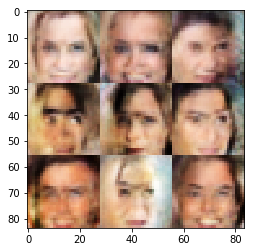

Epoch 1/1... Discriminator Loss: 2.2810... Generator Loss: 0.1661
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.8454... Generator Loss: 0.2625
Epoch 1/1... Discriminator Loss: 1.9570... Generator Loss: 0.2265
Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 0.8438
Epoch 1/1... Discriminator Loss: 1.7716... Generator Loss: 0.3515
Epoch 1/1... Discriminator Loss: 2.0646... Generator Loss: 0.1976
Epoch 1/1... Discriminator Loss: 1.6101... Generator Loss: 0.3576
Epoch 1/1... Discriminator Loss: 1.8793... Generator Loss: 0.2570
Epoch 1/1... Discriminator Loss: 1.6204... Generator Loss: 0.3457


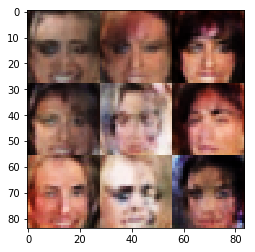

Epoch 1/1... Discriminator Loss: 1.7488... Generator Loss: 0.3312
Epoch 1/1... Discriminator Loss: 2.5525... Generator Loss: 0.1174
Epoch 1/1... Discriminator Loss: 1.8746... Generator Loss: 0.3146
Epoch 1/1... Discriminator Loss: 1.9112... Generator Loss: 0.2401
Epoch 1/1... Discriminator Loss: 1.8711... Generator Loss: 0.2663
Epoch 1/1... Discriminator Loss: 2.0178... Generator Loss: 0.2902
Epoch 1/1... Discriminator Loss: 1.0288... Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 2.1243... Generator Loss: 0.1960
Epoch 1/1... Discriminator Loss: 1.1522... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 0.4691... Generator Loss: 2.4594


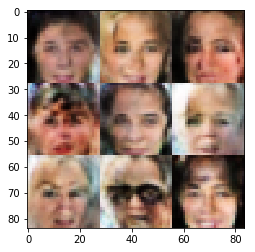

Epoch 1/1... Discriminator Loss: 1.8260... Generator Loss: 0.3742
Epoch 1/1... Discriminator Loss: 1.6241... Generator Loss: 0.3517
Epoch 1/1... Discriminator Loss: 2.6049... Generator Loss: 0.1118
Epoch 1/1... Discriminator Loss: 1.5430... Generator Loss: 0.4487
Epoch 1/1... Discriminator Loss: 2.2026... Generator Loss: 0.1900
Epoch 1/1... Discriminator Loss: 2.3748... Generator Loss: 0.1889
Epoch 1/1... Discriminator Loss: 1.1075... Generator Loss: 1.6033
Epoch 1/1... Discriminator Loss: 1.8860... Generator Loss: 0.2834
Epoch 1/1... Discriminator Loss: 2.6830... Generator Loss: 0.1032
Epoch 1/1... Discriminator Loss: 2.3666... Generator Loss: 0.1518


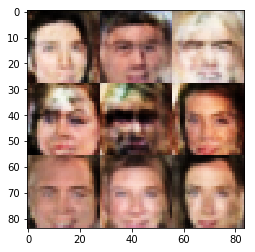

Epoch 1/1... Discriminator Loss: 2.0118... Generator Loss: 0.2442
Epoch 1/1... Discriminator Loss: 1.0697... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 0.9250
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 1.3573
Epoch 1/1... Discriminator Loss: 2.9037... Generator Loss: 0.0852
Epoch 1/1... Discriminator Loss: 2.2632... Generator Loss: 0.1818
Epoch 1/1... Discriminator Loss: 1.7438... Generator Loss: 0.3096
Epoch 1/1... Discriminator Loss: 1.9643... Generator Loss: 0.2369
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 0.6009
Epoch 1/1... Discriminator Loss: 2.1384... Generator Loss: 0.2087


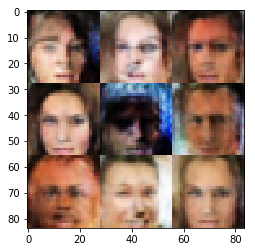

Epoch 1/1... Discriminator Loss: 2.1950... Generator Loss: 0.1751
Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 2.4169... Generator Loss: 0.1381
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 0.7613
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.5236
Epoch 1/1... Discriminator Loss: 1.6571... Generator Loss: 0.4114
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.4975
Epoch 1/1... Discriminator Loss: 2.2436... Generator Loss: 0.1860
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 1.8587... Generator Loss: 0.3244


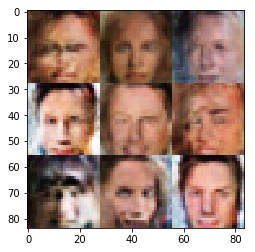

Epoch 1/1... Discriminator Loss: 2.1028... Generator Loss: 0.2050
Epoch 1/1... Discriminator Loss: 0.6820... Generator Loss: 1.5764
Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 0.3766
Epoch 1/1... Discriminator Loss: 1.9632... Generator Loss: 0.2343
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.4371
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.9355... Generator Loss: 0.2646
Epoch 1/1... Discriminator Loss: 2.7323... Generator Loss: 0.1069
Epoch 1/1... Discriminator Loss: 2.0390... Generator Loss: 0.2507
Epoch 1/1... Discriminator Loss: 1.9155... Generator Loss: 0.2872


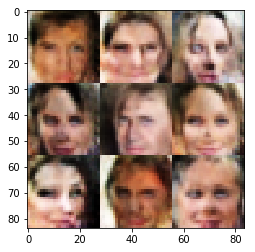

Epoch 1/1... Discriminator Loss: 2.3243... Generator Loss: 0.1648
Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.4316
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 0.7995... Generator Loss: 1.2141
Epoch 1/1... Discriminator Loss: 2.6209... Generator Loss: 0.1089
Epoch 1/1... Discriminator Loss: 2.0588... Generator Loss: 0.2033
Epoch 1/1... Discriminator Loss: 1.8034... Generator Loss: 0.3114
Epoch 1/1... Discriminator Loss: 0.7182... Generator Loss: 1.8115
Epoch 1/1... Discriminator Loss: 1.7346... Generator Loss: 0.3252
Epoch 1/1... Discriminator Loss: 1.8974... Generator Loss: 0.2446


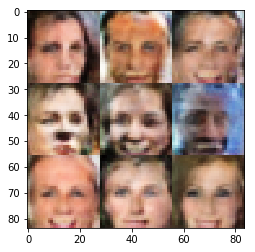

Epoch 1/1... Discriminator Loss: 0.6035... Generator Loss: 2.1568
Epoch 1/1... Discriminator Loss: 2.6815... Generator Loss: 0.1470
Epoch 1/1... Discriminator Loss: 2.6473... Generator Loss: 0.1255
Epoch 1/1... Discriminator Loss: 2.0147... Generator Loss: 0.2965
Epoch 1/1... Discriminator Loss: 2.5100... Generator Loss: 0.1566
Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 2.3606... Generator Loss: 0.1418
Epoch 1/1... Discriminator Loss: 1.8873... Generator Loss: 0.2467
Epoch 1/1... Discriminator Loss: 1.0410... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 0.8595... Generator Loss: 0.9942


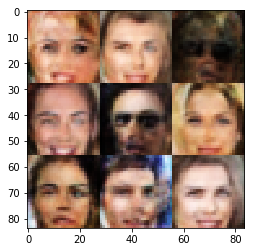

Epoch 1/1... Discriminator Loss: 2.2791... Generator Loss: 0.1619
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.4913
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 0.8899... Generator Loss: 1.1973
Epoch 1/1... Discriminator Loss: 1.2312... Generator Loss: 0.5360
Epoch 1/1... Discriminator Loss: 1.5199... Generator Loss: 0.3630
Epoch 1/1... Discriminator Loss: 2.4001... Generator Loss: 0.1391
Epoch 1/1... Discriminator Loss: 2.7082... Generator Loss: 0.1081
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 2.4740... Generator Loss: 0.1338


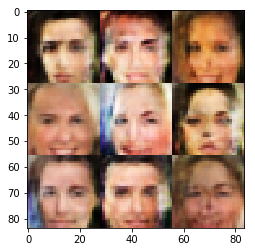

Epoch 1/1... Discriminator Loss: 0.5257... Generator Loss: 2.0171
Epoch 1/1... Discriminator Loss: 2.2407... Generator Loss: 0.1713
Epoch 1/1... Discriminator Loss: 2.0065... Generator Loss: 0.2557
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 1.0313
Epoch 1/1... Discriminator Loss: 1.9242... Generator Loss: 0.2530
Epoch 1/1... Discriminator Loss: 2.5145... Generator Loss: 0.1487
Epoch 1/1... Discriminator Loss: 0.8905... Generator Loss: 1.5374
Epoch 1/1... Discriminator Loss: 2.4522... Generator Loss: 0.1487
Epoch 1/1... Discriminator Loss: 1.8217... Generator Loss: 0.2739
Epoch 1/1... Discriminator Loss: 2.0684... Generator Loss: 0.2134


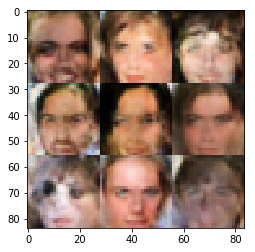

Epoch 1/1... Discriminator Loss: 2.2705... Generator Loss: 0.2084
Epoch 1/1... Discriminator Loss: 1.8122... Generator Loss: 0.3164
Epoch 1/1... Discriminator Loss: 1.5251... Generator Loss: 0.3979
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 2.0532
Epoch 1/1... Discriminator Loss: 1.0066... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.3391... Generator Loss: 0.4902
Epoch 1/1... Discriminator Loss: 2.1118... Generator Loss: 0.1967
Epoch 1/1... Discriminator Loss: 1.4978... Generator Loss: 1.8226
Epoch 1/1... Discriminator Loss: 1.9563... Generator Loss: 0.2293
Epoch 1/1... Discriminator Loss: 2.3890... Generator Loss: 0.1712


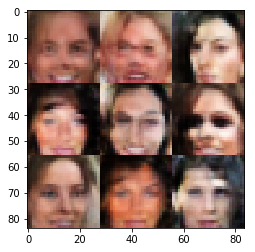

Epoch 1/1... Discriminator Loss: 1.6099... Generator Loss: 0.3932
Epoch 1/1... Discriminator Loss: 2.2406... Generator Loss: 0.1798
Epoch 1/1... Discriminator Loss: 1.8614... Generator Loss: 0.3217
Epoch 1/1... Discriminator Loss: 2.2035... Generator Loss: 0.2113
Epoch 1/1... Discriminator Loss: 0.8244... Generator Loss: 2.3678
Epoch 1/1... Discriminator Loss: 0.5818... Generator Loss: 2.6482
Epoch 1/1... Discriminator Loss: 1.7928... Generator Loss: 0.2945
Epoch 1/1... Discriminator Loss: 1.1448... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 2.5893... Generator Loss: 0.1324
Epoch 1/1... Discriminator Loss: 1.1161... Generator Loss: 0.8146


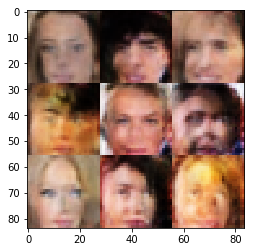

Epoch 1/1... Discriminator Loss: 1.6069... Generator Loss: 0.3596
Epoch 1/1... Discriminator Loss: 0.8447... Generator Loss: 1.2179
Epoch 1/1... Discriminator Loss: 1.9915... Generator Loss: 0.2221
Epoch 1/1... Discriminator Loss: 2.0541... Generator Loss: 0.1994
Epoch 1/1... Discriminator Loss: 1.8364... Generator Loss: 0.2695
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.4377
Epoch 1/1... Discriminator Loss: 2.6610... Generator Loss: 0.1144
Epoch 1/1... Discriminator Loss: 1.0475... Generator Loss: 1.2415
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.5029
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 0.5019


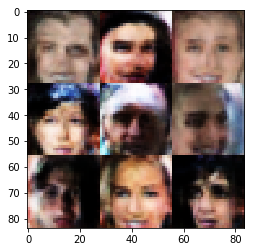

Epoch 1/1... Discriminator Loss: 1.0038... Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 1.0530... Generator Loss: 0.7065
Epoch 1/1... Discriminator Loss: 1.7546... Generator Loss: 0.3840
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.4753
Epoch 1/1... Discriminator Loss: 0.5656... Generator Loss: 2.4176
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.4622
Epoch 1/1... Discriminator Loss: 2.6117... Generator Loss: 0.1237
Epoch 1/1... Discriminator Loss: 1.9572... Generator Loss: 0.2308
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 1.7644


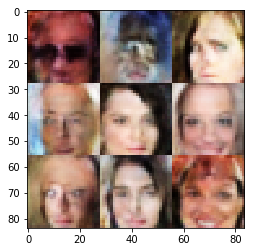

Epoch 1/1... Discriminator Loss: 1.9372... Generator Loss: 0.2277
Epoch 1/1... Discriminator Loss: 2.0453... Generator Loss: 0.2066
Epoch 1/1... Discriminator Loss: 1.8255... Generator Loss: 0.2711
Epoch 1/1... Discriminator Loss: 1.9160... Generator Loss: 0.2668
Epoch 1/1... Discriminator Loss: 1.0084... Generator Loss: 0.8057
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 0.9250... Generator Loss: 1.1949
Epoch 1/1... Discriminator Loss: 1.2534... Generator Loss: 0.6215
Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 1.1077
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 1.0588


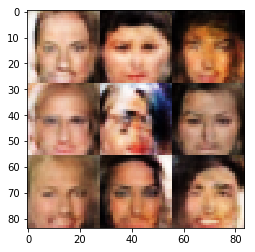

Epoch 1/1... Discriminator Loss: 2.3267... Generator Loss: 0.1528
Epoch 1/1... Discriminator Loss: 2.1462... Generator Loss: 0.2879
Epoch 1/1... Discriminator Loss: 1.8915... Generator Loss: 0.3077
Epoch 1/1... Discriminator Loss: 0.7891... Generator Loss: 2.1584
Epoch 1/1... Discriminator Loss: 0.7626... Generator Loss: 5.1198
Epoch 1/1... Discriminator Loss: 1.8632... Generator Loss: 0.2594
Epoch 1/1... Discriminator Loss: 1.8901... Generator Loss: 0.2384
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 0.8097
Epoch 1/1... Discriminator Loss: 0.9930... Generator Loss: 1.4355
Epoch 1/1... Discriminator Loss: 2.0275... Generator Loss: 0.2075


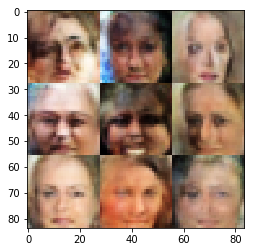

Epoch 1/1... Discriminator Loss: 1.1161... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.6291... Generator Loss: 0.3222
Epoch 1/1... Discriminator Loss: 1.6060... Generator Loss: 0.3716
Epoch 1/1... Discriminator Loss: 2.3899... Generator Loss: 0.2624
Epoch 1/1... Discriminator Loss: 2.1679... Generator Loss: 0.1812
Epoch 1/1... Discriminator Loss: 1.4386... Generator Loss: 0.4786
Epoch 1/1... Discriminator Loss: 1.9663... Generator Loss: 0.2416
Epoch 1/1... Discriminator Loss: 1.0439... Generator Loss: 0.7993
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.3261
Epoch 1/1... Discriminator Loss: 2.2952... Generator Loss: 0.1554


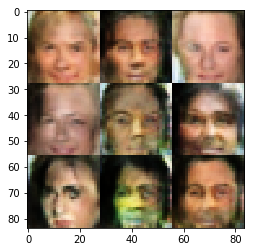

Epoch 1/1... Discriminator Loss: 2.0461... Generator Loss: 0.2151
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.6063
Epoch 1/1... Discriminator Loss: 1.9214... Generator Loss: 0.2581
Epoch 1/1... Discriminator Loss: 1.0807... Generator Loss: 0.8496
Epoch 1/1... Discriminator Loss: 1.9003... Generator Loss: 0.2781
Epoch 1/1... Discriminator Loss: 2.4973... Generator Loss: 0.1247
Epoch 1/1... Discriminator Loss: 1.4622... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.6593
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.6325


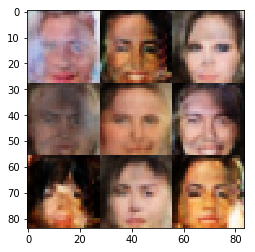

Epoch 1/1... Discriminator Loss: 2.1959... Generator Loss: 0.2026
Epoch 1/1... Discriminator Loss: 2.9152... Generator Loss: 0.0902
Epoch 1/1... Discriminator Loss: 1.5588... Generator Loss: 0.4181
Epoch 1/1... Discriminator Loss: 1.9246... Generator Loss: 0.2624
Epoch 1/1... Discriminator Loss: 1.1252... Generator Loss: 0.8018
Epoch 1/1... Discriminator Loss: 2.4065... Generator Loss: 0.1593
Epoch 1/1... Discriminator Loss: 1.0419... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 1.5082
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 2.1709... Generator Loss: 0.2569


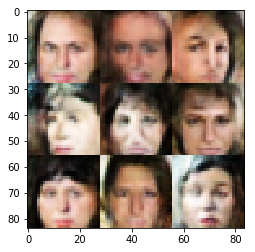

Epoch 1/1... Discriminator Loss: 1.8288... Generator Loss: 0.2595
Epoch 1/1... Discriminator Loss: 2.3307... Generator Loss: 0.1632
Epoch 1/1... Discriminator Loss: 0.6709... Generator Loss: 1.5629
Epoch 1/1... Discriminator Loss: 0.8516... Generator Loss: 0.9946
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.5729
Epoch 1/1... Discriminator Loss: 2.0728... Generator Loss: 0.1992
Epoch 1/1... Discriminator Loss: 1.5629... Generator Loss: 0.4384
Epoch 1/1... Discriminator Loss: 0.7732... Generator Loss: 1.9602
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 0.5827
Epoch 1/1... Discriminator Loss: 0.7926... Generator Loss: 1.0513


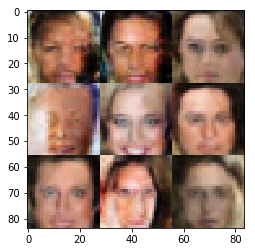

Epoch 1/1... Discriminator Loss: 2.3870... Generator Loss: 0.1407
Epoch 1/1... Discriminator Loss: 2.1432... Generator Loss: 0.2164
Epoch 1/1... Discriminator Loss: 2.2242... Generator Loss: 0.1776
Epoch 1/1... Discriminator Loss: 2.1523... Generator Loss: 0.2021
Epoch 1/1... Discriminator Loss: 2.4241... Generator Loss: 0.1429
Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 0.9239... Generator Loss: 1.9511
Epoch 1/1... Discriminator Loss: 1.8104... Generator Loss: 0.2998
Epoch 1/1... Discriminator Loss: 0.6650... Generator Loss: 1.4979
Epoch 1/1... Discriminator Loss: 1.6049... Generator Loss: 0.3782


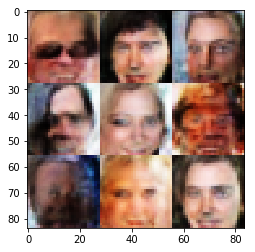

Epoch 1/1... Discriminator Loss: 2.4304... Generator Loss: 0.1457
Epoch 1/1... Discriminator Loss: 1.8645... Generator Loss: 0.2566
Epoch 1/1... Discriminator Loss: 0.6524... Generator Loss: 1.3724
Epoch 1/1... Discriminator Loss: 1.6149... Generator Loss: 0.3557
Epoch 1/1... Discriminator Loss: 1.8680... Generator Loss: 0.2701
Epoch 1/1... Discriminator Loss: 0.5422... Generator Loss: 1.8842
Epoch 1/1... Discriminator Loss: 1.0982... Generator Loss: 1.2083
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.5661
Epoch 1/1... Discriminator Loss: 0.9947... Generator Loss: 2.0355
Epoch 1/1... Discriminator Loss: 2.0279... Generator Loss: 0.2186


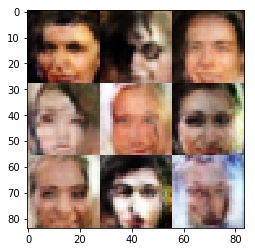

Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.8402... Generator Loss: 0.2752
Epoch 1/1... Discriminator Loss: 2.5219... Generator Loss: 0.1220
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.6398... Generator Loss: 0.3812
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 2.8848... Generator Loss: 0.0853
Epoch 1/1... Discriminator Loss: 1.6323... Generator Loss: 0.4032
Epoch 1/1... Discriminator Loss: 2.0430... Generator Loss: 0.2032
Epoch 1/1... Discriminator Loss: 2.4888... Generator Loss: 0.1272


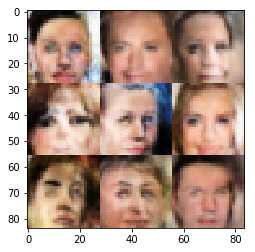

Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 0.8722
Epoch 1/1... Discriminator Loss: 1.8588... Generator Loss: 0.2578
Epoch 1/1... Discriminator Loss: 1.9483... Generator Loss: 0.2417
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.6274... Generator Loss: 0.4529
Epoch 1/1... Discriminator Loss: 1.0986... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.9259... Generator Loss: 0.2603
Epoch 1/1... Discriminator Loss: 1.4693... Generator Loss: 0.4366
Epoch 1/1... Discriminator Loss: 2.8467... Generator Loss: 0.1068
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.5463


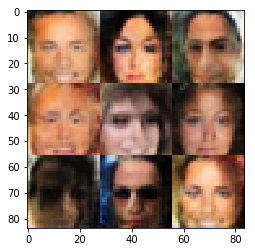

Epoch 1/1... Discriminator Loss: 2.4982... Generator Loss: 0.1333
Epoch 1/1... Discriminator Loss: 2.7516... Generator Loss: 0.0984
Epoch 1/1... Discriminator Loss: 0.5731... Generator Loss: 1.9948
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 0.8731... Generator Loss: 0.8837
Epoch 1/1... Discriminator Loss: 1.7659... Generator Loss: 0.2887
Epoch 1/1... Discriminator Loss: 0.9901... Generator Loss: 1.0949
Epoch 1/1... Discriminator Loss: 2.4217... Generator Loss: 0.1628


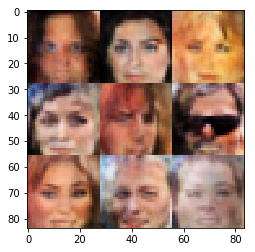

Epoch 1/1... Discriminator Loss: 2.1144... Generator Loss: 0.2079
Epoch 1/1... Discriminator Loss: 1.7079... Generator Loss: 0.3344
Epoch 1/1... Discriminator Loss: 2.4529... Generator Loss: 0.1409
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.5017
Epoch 1/1... Discriminator Loss: 1.8709... Generator Loss: 0.2416
Epoch 1/1... Discriminator Loss: 1.1378... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.1101... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.5317
Epoch 1/1... Discriminator Loss: 1.8341... Generator Loss: 0.2888
Epoch 1/1... Discriminator Loss: 2.1870... Generator Loss: 0.2300


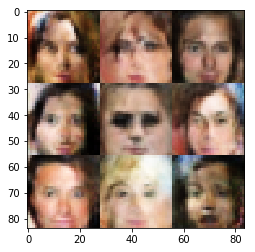

Epoch 1/1... Discriminator Loss: 1.1112... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 2.0400... Generator Loss: 0.2806
Epoch 1/1... Discriminator Loss: 2.1808... Generator Loss: 0.1858
Epoch 1/1... Discriminator Loss: 1.0644... Generator Loss: 0.8099
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.5325
Epoch 1/1... Discriminator Loss: 2.2833... Generator Loss: 0.1814
Epoch 1/1... Discriminator Loss: 1.5211... Generator Loss: 0.4021
Epoch 1/1... Discriminator Loss: 2.8127... Generator Loss: 0.0994
Epoch 1/1... Discriminator Loss: 1.7666... Generator Loss: 0.3047
Epoch 1/1... Discriminator Loss: 2.7787... Generator Loss: 0.0983


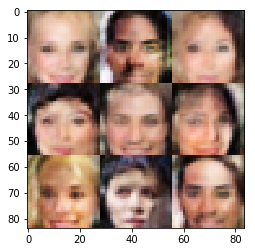

Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.0788... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 0.8376... Generator Loss: 1.5397
Epoch 1/1... Discriminator Loss: 2.8251... Generator Loss: 0.1259
Epoch 1/1... Discriminator Loss: 2.3921... Generator Loss: 0.1415
Epoch 1/1... Discriminator Loss: 2.5210... Generator Loss: 0.1559
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 0.8124
Epoch 1/1... Discriminator Loss: 1.7865... Generator Loss: 0.3058
Epoch 1/1... Discriminator Loss: 2.1064... Generator Loss: 0.1885
Epoch 1/1... Discriminator Loss: 1.9038... Generator Loss: 0.2863


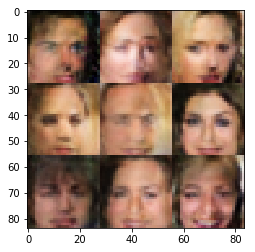

Epoch 1/1... Discriminator Loss: 1.7159... Generator Loss: 0.3232
Epoch 1/1... Discriminator Loss: 2.4649... Generator Loss: 0.1295
Epoch 1/1... Discriminator Loss: 0.8477... Generator Loss: 1.0495
Epoch 1/1... Discriminator Loss: 2.3448... Generator Loss: 0.1533
Epoch 1/1... Discriminator Loss: 1.2057... Generator Loss: 0.5748
Epoch 1/1... Discriminator Loss: 2.6473... Generator Loss: 0.1369
Epoch 1/1... Discriminator Loss: 2.4116... Generator Loss: 0.1571
Epoch 1/1... Discriminator Loss: 1.6003... Generator Loss: 0.3535
Epoch 1/1... Discriminator Loss: 1.3040... Generator Loss: 0.5728
Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.5327


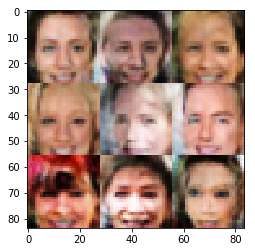

Epoch 1/1... Discriminator Loss: 2.5741... Generator Loss: 0.1193
Epoch 1/1... Discriminator Loss: 1.9799... Generator Loss: 0.2414
Epoch 1/1... Discriminator Loss: 1.7825... Generator Loss: 0.4275
Epoch 1/1... Discriminator Loss: 2.3303... Generator Loss: 0.1732
Epoch 1/1... Discriminator Loss: 0.8719... Generator Loss: 1.0041
Epoch 1/1... Discriminator Loss: 2.7608... Generator Loss: 0.1107
Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 1.2866
Epoch 1/1... Discriminator Loss: 1.8362... Generator Loss: 0.2630
Epoch 1/1... Discriminator Loss: 1.7233... Generator Loss: 0.3255
Epoch 1/1... Discriminator Loss: 0.7596... Generator Loss: 1.3303


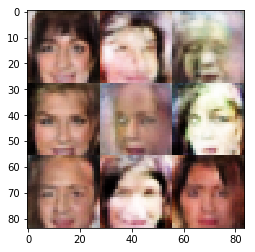

Epoch 1/1... Discriminator Loss: 1.8077... Generator Loss: 0.3916
Epoch 1/1... Discriminator Loss: 2.0504... Generator Loss: 0.2112
Epoch 1/1... Discriminator Loss: 1.9645... Generator Loss: 0.2456
Epoch 1/1... Discriminator Loss: 1.8675... Generator Loss: 0.2982
Epoch 1/1... Discriminator Loss: 1.7680... Generator Loss: 0.2884
Epoch 1/1... Discriminator Loss: 1.6425... Generator Loss: 0.3587
Epoch 1/1... Discriminator Loss: 1.5031... Generator Loss: 0.4425
Epoch 1/1... Discriminator Loss: 1.8812... Generator Loss: 0.2680
Epoch 1/1... Discriminator Loss: 1.6949... Generator Loss: 0.3344
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.0226


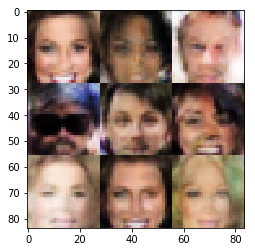

Epoch 1/1... Discriminator Loss: 1.6184... Generator Loss: 0.3886
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.7191
Epoch 1/1... Discriminator Loss: 1.9955... Generator Loss: 0.2207
Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 0.6832... Generator Loss: 1.3527
Epoch 1/1... Discriminator Loss: 1.9654... Generator Loss: 0.2283
Epoch 1/1... Discriminator Loss: 1.7994... Generator Loss: 0.2890
Epoch 1/1... Discriminator Loss: 0.7472... Generator Loss: 1.2051
Epoch 1/1... Discriminator Loss: 0.7913... Generator Loss: 1.2847


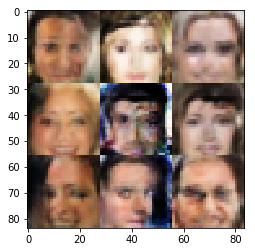

Epoch 1/1... Discriminator Loss: 2.0485... Generator Loss: 0.2360
Epoch 1/1... Discriminator Loss: 2.7777... Generator Loss: 0.0930
Epoch 1/1... Discriminator Loss: 1.7685... Generator Loss: 0.4502
Epoch 1/1... Discriminator Loss: 2.3048... Generator Loss: 0.1633
Epoch 1/1... Discriminator Loss: 2.6606... Generator Loss: 0.1194
Epoch 1/1... Discriminator Loss: 1.9366... Generator Loss: 0.2526
Epoch 1/1... Discriminator Loss: 1.5505... Generator Loss: 0.4661
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.7517
Epoch 1/1... Discriminator Loss: 2.7029... Generator Loss: 0.1158
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 0.8172


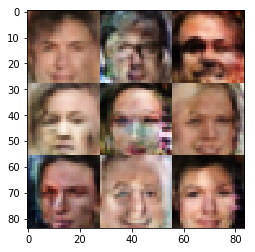

Epoch 1/1... Discriminator Loss: 2.7273... Generator Loss: 0.1224
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.4950... Generator Loss: 0.4376
Epoch 1/1... Discriminator Loss: 1.6966... Generator Loss: 0.3095
Epoch 1/1... Discriminator Loss: 2.3376... Generator Loss: 0.1894
Epoch 1/1... Discriminator Loss: 2.2058... Generator Loss: 0.1813
Epoch 1/1... Discriminator Loss: 2.7185... Generator Loss: 0.1023
Epoch 1/1... Discriminator Loss: 1.8081... Generator Loss: 0.3043
Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 1.2517
Epoch 1/1... Discriminator Loss: 1.9157... Generator Loss: 0.2372


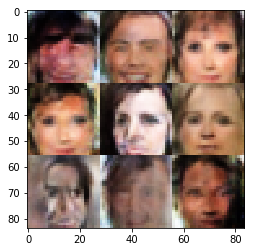

Epoch 1/1... Discriminator Loss: 2.0526... Generator Loss: 0.2212
Epoch 1/1... Discriminator Loss: 3.0991... Generator Loss: 0.0798
Epoch 1/1... Discriminator Loss: 2.3313... Generator Loss: 0.1498
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.3897
Epoch 1/1... Discriminator Loss: 1.9608... Generator Loss: 0.2610
Epoch 1/1... Discriminator Loss: 1.4965... Generator Loss: 0.3986
Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 0.7221
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 2.1110... Generator Loss: 0.2105
Epoch 1/1... Discriminator Loss: 2.0625... Generator Loss: 0.2186


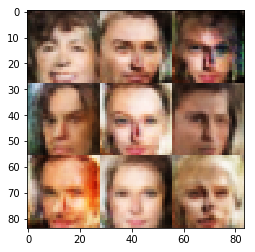

Epoch 1/1... Discriminator Loss: 1.8774... Generator Loss: 0.3857
Epoch 1/1... Discriminator Loss: 1.1235... Generator Loss: 1.2744
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 2.8969
Epoch 1/1... Discriminator Loss: 1.5036... Generator Loss: 0.4071
Epoch 1/1... Discriminator Loss: 2.3615... Generator Loss: 0.1676
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.5296
Epoch 1/1... Discriminator Loss: 1.5495... Generator Loss: 0.4533
Epoch 1/1... Discriminator Loss: 1.0541... Generator Loss: 1.1085
Epoch 1/1... Discriminator Loss: 2.0884... Generator Loss: 0.2001
Epoch 1/1... Discriminator Loss: 2.8478... Generator Loss: 0.1080


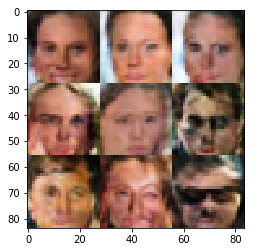

Epoch 1/1... Discriminator Loss: 2.6803... Generator Loss: 0.1117
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 2.4958... Generator Loss: 0.1502
Epoch 1/1... Discriminator Loss: 1.6681... Generator Loss: 0.3540
Epoch 1/1... Discriminator Loss: 0.9189... Generator Loss: 3.1266
Epoch 1/1... Discriminator Loss: 1.6100... Generator Loss: 0.3491
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 1.1512
Epoch 1/1... Discriminator Loss: 1.1319... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 3.0317... Generator Loss: 0.0878
Epoch 1/1... Discriminator Loss: 2.5872... Generator Loss: 0.1196


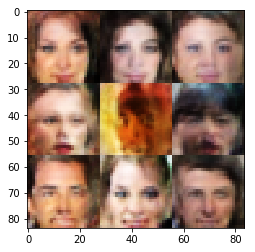

Epoch 1/1... Discriminator Loss: 2.5648... Generator Loss: 0.1186
Epoch 1/1... Discriminator Loss: 1.6976... Generator Loss: 0.3075
Epoch 1/1... Discriminator Loss: 1.7496... Generator Loss: 0.3522
Epoch 1/1... Discriminator Loss: 1.9752... Generator Loss: 0.2345
Epoch 1/1... Discriminator Loss: 2.4655... Generator Loss: 0.1274
Epoch 1/1... Discriminator Loss: 2.0663... Generator Loss: 0.2226
Epoch 1/1... Discriminator Loss: 1.9941... Generator Loss: 0.2303
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.4690
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.6085
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.2990


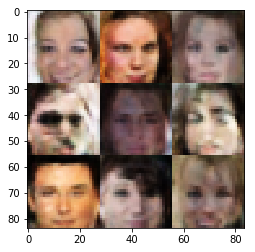

Epoch 1/1... Discriminator Loss: 1.1445... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.6608... Generator Loss: 0.3966
Epoch 1/1... Discriminator Loss: 1.5197... Generator Loss: 0.3828
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.3748
Epoch 1/1... Discriminator Loss: 1.5202... Generator Loss: 0.4392
Epoch 1/1... Discriminator Loss: 2.4173... Generator Loss: 0.1425
Epoch 1/1... Discriminator Loss: 2.2422... Generator Loss: 0.1715
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 1.0972
Epoch 1/1... Discriminator Loss: 0.6456... Generator Loss: 1.5992
Epoch 1/1... Discriminator Loss: 0.8914... Generator Loss: 3.7294


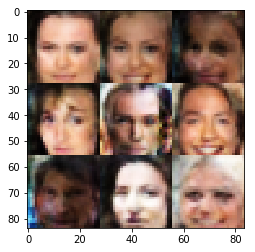

Epoch 1/1... Discriminator Loss: 2.1357... Generator Loss: 0.1916
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 1.5215
Epoch 1/1... Discriminator Loss: 2.5137... Generator Loss: 0.1295
Epoch 1/1... Discriminator Loss: 2.8607... Generator Loss: 0.0915
Epoch 1/1... Discriminator Loss: 2.5558... Generator Loss: 0.1223
Epoch 1/1... Discriminator Loss: 1.1779... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 2.0279... Generator Loss: 0.2733
Epoch 1/1... Discriminator Loss: 1.9935... Generator Loss: 0.2340
Epoch 1/1... Discriminator Loss: 2.0720... Generator Loss: 0.2393
Epoch 1/1... Discriminator Loss: 0.6389... Generator Loss: 1.4672


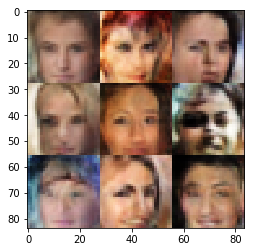

Epoch 1/1... Discriminator Loss: 1.8588... Generator Loss: 0.2789
Epoch 1/1... Discriminator Loss: 1.7895... Generator Loss: 0.2879
Epoch 1/1... Discriminator Loss: 1.9301... Generator Loss: 0.2429
Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 0.6142
Epoch 1/1... Discriminator Loss: 1.6631... Generator Loss: 0.3243
Epoch 1/1... Discriminator Loss: 1.9969... Generator Loss: 0.2302
Epoch 1/1... Discriminator Loss: 2.0743... Generator Loss: 0.2055
Epoch 1/1... Discriminator Loss: 2.2819... Generator Loss: 0.1592
Epoch 1/1... Discriminator Loss: 1.6550... Generator Loss: 0.3384
Epoch 1/1... Discriminator Loss: 2.4712... Generator Loss: 0.1327


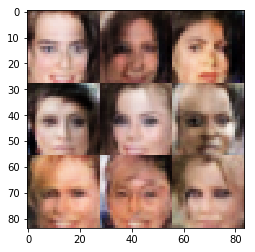

Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.5746
Epoch 1/1... Discriminator Loss: 1.9191... Generator Loss: 0.2587
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 2.0985... Generator Loss: 0.2161
Epoch 1/1... Discriminator Loss: 0.7637... Generator Loss: 1.2941
Epoch 1/1... Discriminator Loss: 2.4488... Generator Loss: 0.1327
Epoch 1/1... Discriminator Loss: 3.0310... Generator Loss: 0.0874
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 0.6876... Generator Loss: 2.4129
Epoch 1/1... Discriminator Loss: 0.8406... Generator Loss: 1.1756


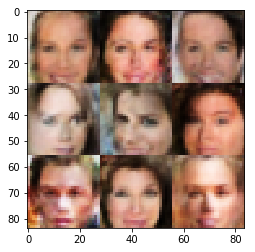

Epoch 1/1... Discriminator Loss: 3.0418... Generator Loss: 0.0744
Epoch 1/1... Discriminator Loss: 2.3851... Generator Loss: 0.1496
Epoch 1/1... Discriminator Loss: 2.1894... Generator Loss: 0.1780
Epoch 1/1... Discriminator Loss: 0.6084... Generator Loss: 2.1702
Epoch 1/1... Discriminator Loss: 2.1681... Generator Loss: 0.1793
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 0.6092... Generator Loss: 1.8953
Epoch 1/1... Discriminator Loss: 2.4198... Generator Loss: 0.1565
Epoch 1/1... Discriminator Loss: 2.2658... Generator Loss: 0.1632
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 0.4012


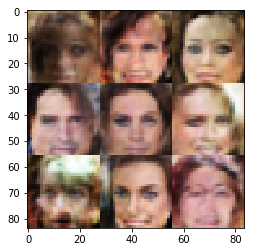

Epoch 1/1... Discriminator Loss: 2.9419... Generator Loss: 0.0772
Epoch 1/1... Discriminator Loss: 1.9080... Generator Loss: 0.2379
Epoch 1/1... Discriminator Loss: 3.0403... Generator Loss: 0.0708
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 2.5903... Generator Loss: 0.1241
Epoch 1/1... Discriminator Loss: 0.6858... Generator Loss: 1.3717
Epoch 1/1... Discriminator Loss: 1.7324... Generator Loss: 0.3296
Epoch 1/1... Discriminator Loss: 3.1098... Generator Loss: 0.0877
Epoch 1/1... Discriminator Loss: 2.0611... Generator Loss: 0.2376
Epoch 1/1... Discriminator Loss: 2.6306... Generator Loss: 0.1561


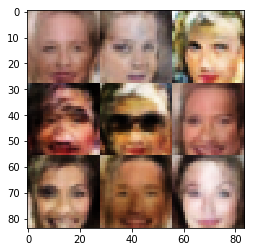

Epoch 1/1... Discriminator Loss: 1.5917... Generator Loss: 0.3896
Epoch 1/1... Discriminator Loss: 2.7074... Generator Loss: 0.1132
Epoch 1/1... Discriminator Loss: 2.2573... Generator Loss: 0.1657
Epoch 1/1... Discriminator Loss: 2.0723... Generator Loss: 0.2195
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 0.8418
Epoch 1/1... Discriminator Loss: 0.8358... Generator Loss: 1.9232
Epoch 1/1... Discriminator Loss: 2.3992... Generator Loss: 0.1362
Epoch 1/1... Discriminator Loss: 0.9079... Generator Loss: 1.1386
Epoch 1/1... Discriminator Loss: 1.0494... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.5129


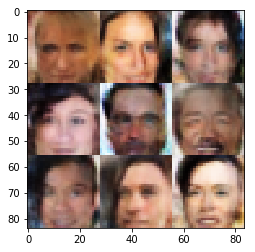

Epoch 1/1... Discriminator Loss: 2.4669... Generator Loss: 0.1409
Epoch 1/1... Discriminator Loss: 2.3805... Generator Loss: 0.1449
Epoch 1/1... Discriminator Loss: 2.4926... Generator Loss: 0.1339
Epoch 1/1... Discriminator Loss: 2.6332... Generator Loss: 0.1126
Epoch 1/1... Discriminator Loss: 1.4989... Generator Loss: 0.6338
Epoch 1/1... Discriminator Loss: 1.8944... Generator Loss: 0.2424
Epoch 1/1... Discriminator Loss: 2.0532... Generator Loss: 0.2091
Epoch 1/1... Discriminator Loss: 2.2473... Generator Loss: 0.2161
Epoch 1/1... Discriminator Loss: 1.9563... Generator Loss: 0.2553
Epoch 1/1... Discriminator Loss: 3.2336... Generator Loss: 0.0680


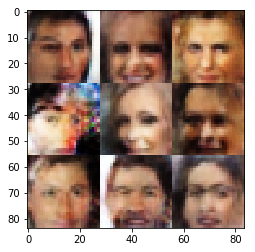

Epoch 1/1... Discriminator Loss: 2.9279... Generator Loss: 0.1003
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 1.1289
Epoch 1/1... Discriminator Loss: 2.2648... Generator Loss: 0.1703
Epoch 1/1... Discriminator Loss: 2.4883... Generator Loss: 0.1359
Epoch 1/1... Discriminator Loss: 0.6795... Generator Loss: 1.5439
Epoch 1/1... Discriminator Loss: 2.1243... Generator Loss: 0.2341
Epoch 1/1... Discriminator Loss: 1.8313... Generator Loss: 0.2699
Epoch 1/1... Discriminator Loss: 0.7464... Generator Loss: 1.3562
Epoch 1/1... Discriminator Loss: 0.6271... Generator Loss: 2.3630
Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 1.0516


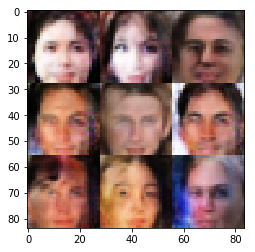

Epoch 1/1... Discriminator Loss: 2.0012... Generator Loss: 0.2326
Epoch 1/1... Discriminator Loss: 1.6830... Generator Loss: 0.3799
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.8561... Generator Loss: 0.2561
Epoch 1/1... Discriminator Loss: 1.9000... Generator Loss: 0.2506
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.4618
Epoch 1/1... Discriminator Loss: 1.3234... Generator Loss: 0.5395
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 2.6889
Epoch 1/1... Discriminator Loss: 0.8195... Generator Loss: 1.1801
Epoch 1/1... Discriminator Loss: 0.7196... Generator Loss: 1.3231


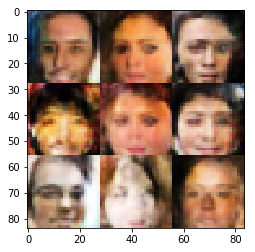

Epoch 1/1... Discriminator Loss: 1.8219... Generator Loss: 0.3187
Epoch 1/1... Discriminator Loss: 1.5446... Generator Loss: 0.4099
Epoch 1/1... Discriminator Loss: 0.6431... Generator Loss: 1.9561
Epoch 1/1... Discriminator Loss: 1.7583... Generator Loss: 0.2900
Epoch 1/1... Discriminator Loss: 1.6546... Generator Loss: 0.3168
Epoch 1/1... Discriminator Loss: 1.1208... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.8594... Generator Loss: 0.2449
Epoch 1/1... Discriminator Loss: 2.5792... Generator Loss: 0.1420
Epoch 1/1... Discriminator Loss: 3.0878... Generator Loss: 0.0826
Epoch 1/1... Discriminator Loss: 2.1944... Generator Loss: 0.2094


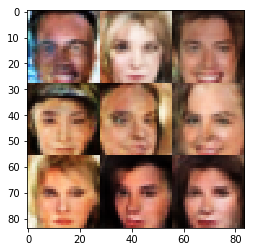

Epoch 1/1... Discriminator Loss: 2.5227... Generator Loss: 0.1514
Epoch 1/1... Discriminator Loss: 2.3102... Generator Loss: 0.1727
Epoch 1/1... Discriminator Loss: 1.7022... Generator Loss: 0.3578
Epoch 1/1... Discriminator Loss: 2.1582... Generator Loss: 0.2006
Epoch 1/1... Discriminator Loss: 1.1690... Generator Loss: 0.7573
Epoch 1/1... Discriminator Loss: 2.9607... Generator Loss: 0.1126
Epoch 1/1... Discriminator Loss: 2.2744... Generator Loss: 0.1802
Epoch 1/1... Discriminator Loss: 1.0583... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 0.7210
Epoch 1/1... Discriminator Loss: 1.8094... Generator Loss: 0.4172


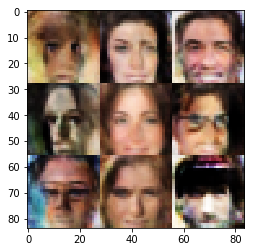

Epoch 1/1... Discriminator Loss: 1.5963... Generator Loss: 0.3714
Epoch 1/1... Discriminator Loss: 2.8482... Generator Loss: 0.1014
Epoch 1/1... Discriminator Loss: 2.9207... Generator Loss: 0.0907
Epoch 1/1... Discriminator Loss: 1.7146... Generator Loss: 0.3474
Epoch 1/1... Discriminator Loss: 2.3307... Generator Loss: 0.1656
Epoch 1/1... Discriminator Loss: 1.6492... Generator Loss: 0.3175
Epoch 1/1... Discriminator Loss: 1.7350... Generator Loss: 0.3226
Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.5471
Epoch 1/1... Discriminator Loss: 0.9060... Generator Loss: 1.1323
Epoch 1/1... Discriminator Loss: 1.9658... Generator Loss: 0.2413


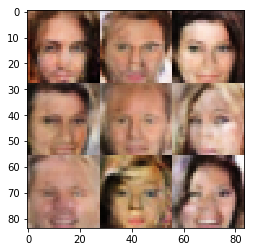

Epoch 1/1... Discriminator Loss: 1.9867... Generator Loss: 0.2287
Epoch 1/1... Discriminator Loss: 2.4465... Generator Loss: 0.1417
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.4990
Epoch 1/1... Discriminator Loss: 1.6915... Generator Loss: 0.3263
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 2.1700... Generator Loss: 0.1882
Epoch 1/1... Discriminator Loss: 1.0824... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.7289... Generator Loss: 0.3315
Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 1.4956
Epoch 1/1... Discriminator Loss: 1.9112... Generator Loss: 0.2568


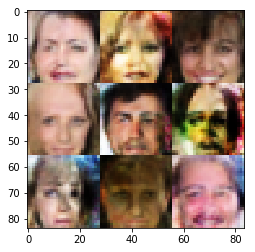

Epoch 1/1... Discriminator Loss: 0.6086... Generator Loss: 2.5316
Epoch 1/1... Discriminator Loss: 2.0049... Generator Loss: 0.2472
Epoch 1/1... Discriminator Loss: 1.8716... Generator Loss: 0.2926
Epoch 1/1... Discriminator Loss: 1.0859... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 0.9555... Generator Loss: 1.0549
Epoch 1/1... Discriminator Loss: 2.1977... Generator Loss: 0.1915
Epoch 1/1... Discriminator Loss: 2.0861... Generator Loss: 0.2224
Epoch 1/1... Discriminator Loss: 1.1512... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 1.0374... Generator Loss: 0.8203
Epoch 1/1... Discriminator Loss: 1.1765... Generator Loss: 0.6432


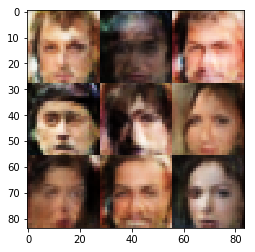

Epoch 1/1... Discriminator Loss: 2.4449... Generator Loss: 0.1439
Epoch 1/1... Discriminator Loss: 2.4948... Generator Loss: 0.1783
Epoch 1/1... Discriminator Loss: 1.9165... Generator Loss: 0.2576
Epoch 1/1... Discriminator Loss: 1.6423... Generator Loss: 0.5083
Epoch 1/1... Discriminator Loss: 2.1451... Generator Loss: 0.2006
Epoch 1/1... Discriminator Loss: 2.2440... Generator Loss: 0.1663
Epoch 1/1... Discriminator Loss: 2.6375... Generator Loss: 0.1368
Epoch 1/1... Discriminator Loss: 1.9269... Generator Loss: 0.2371
Epoch 1/1... Discriminator Loss: 0.9513... Generator Loss: 1.5078
Epoch 1/1... Discriminator Loss: 1.2215... Generator Loss: 0.6858


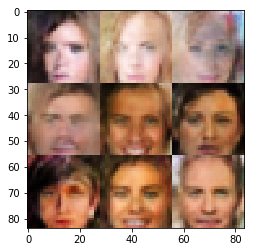

Epoch 1/1... Discriminator Loss: 2.5445... Generator Loss: 0.1298
Epoch 1/1... Discriminator Loss: 2.5908... Generator Loss: 0.1197
Epoch 1/1... Discriminator Loss: 2.7092... Generator Loss: 0.1070
Epoch 1/1... Discriminator Loss: 0.8398... Generator Loss: 0.9692
Epoch 1/1... Discriminator Loss: 2.1636... Generator Loss: 0.1964
Epoch 1/1... Discriminator Loss: 1.4550... Generator Loss: 0.4423
Epoch 1/1... Discriminator Loss: 0.8188... Generator Loss: 1.1801
Epoch 1/1... Discriminator Loss: 1.7892... Generator Loss: 0.3149
Epoch 1/1... Discriminator Loss: 2.2573... Generator Loss: 0.1952
Epoch 1/1... Discriminator Loss: 2.0014... Generator Loss: 0.2666


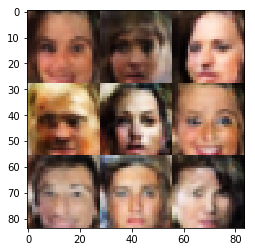

Epoch 1/1... Discriminator Loss: 2.7412... Generator Loss: 0.0999
Epoch 1/1... Discriminator Loss: 1.1126... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 2.9690... Generator Loss: 0.0873
Epoch 1/1... Discriminator Loss: 0.9267... Generator Loss: 1.0654
Epoch 1/1... Discriminator Loss: 2.5728... Generator Loss: 0.1266
Epoch 1/1... Discriminator Loss: 2.0603... Generator Loss: 0.2090
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.5102
Epoch 1/1... Discriminator Loss: 2.7365... Generator Loss: 0.1133
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.4578
Epoch 1/1... Discriminator Loss: 2.2502... Generator Loss: 0.1710


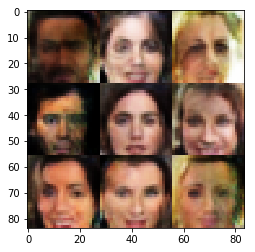

Epoch 1/1... Discriminator Loss: 2.8723... Generator Loss: 0.0962
Epoch 1/1... Discriminator Loss: 1.6935... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 3.1945... Generator Loss: 0.0678
Epoch 1/1... Discriminator Loss: 3.1656... Generator Loss: 0.0698
Epoch 1/1... Discriminator Loss: 2.0009... Generator Loss: 0.2317
Epoch 1/1... Discriminator Loss: 1.6541... Generator Loss: 0.3617
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.5242
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.4274
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.7009
Epoch 1/1... Discriminator Loss: 1.7543... Generator Loss: 0.2982


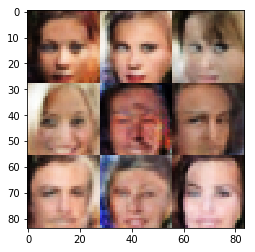

Epoch 1/1... Discriminator Loss: 2.1724... Generator Loss: 0.1894
Epoch 1/1... Discriminator Loss: 2.0052... Generator Loss: 0.2981
Epoch 1/1... Discriminator Loss: 2.1948... Generator Loss: 0.2036
Epoch 1/1... Discriminator Loss: 2.8049... Generator Loss: 0.1079
Epoch 1/1... Discriminator Loss: 2.1050... Generator Loss: 0.2087
Epoch 1/1... Discriminator Loss: 2.1388... Generator Loss: 0.2316
Epoch 1/1... Discriminator Loss: 1.9480... Generator Loss: 0.2435
Epoch 1/1... Discriminator Loss: 2.6184... Generator Loss: 0.1427
Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 0.9643... Generator Loss: 2.0106


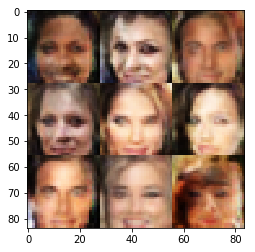

Epoch 1/1... Discriminator Loss: 1.5905... Generator Loss: 0.3399
Epoch 1/1... Discriminator Loss: 1.5015... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 2.2683... Generator Loss: 0.1696
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 0.4369
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 0.6263... Generator Loss: 1.9622
Epoch 1/1... Discriminator Loss: 2.3244... Generator Loss: 0.1604
Epoch 1/1... Discriminator Loss: 1.6929... Generator Loss: 0.3363
Epoch 1/1... Discriminator Loss: 1.9767... Generator Loss: 0.2267
Epoch 1/1... Discriminator Loss: 1.7243... Generator Loss: 0.3719


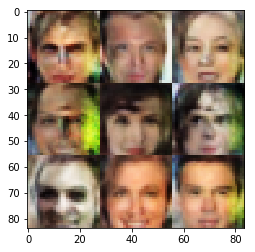

Epoch 1/1... Discriminator Loss: 2.9369... Generator Loss: 0.1330
Epoch 1/1... Discriminator Loss: 2.7654... Generator Loss: 0.1051
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 2.1296... Generator Loss: 0.2154
Epoch 1/1... Discriminator Loss: 1.1078... Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 0.6067
Epoch 1/1... Discriminator Loss: 2.7935... Generator Loss: 0.1011
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.4903
Epoch 1/1... Discriminator Loss: 2.4588... Generator Loss: 0.1438
Epoch 1/1... Discriminator Loss: 2.2041... Generator Loss: 0.1738


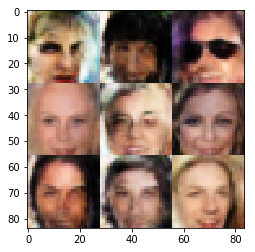

Epoch 1/1... Discriminator Loss: 1.8043... Generator Loss: 0.3292
Epoch 1/1... Discriminator Loss: 1.5792... Generator Loss: 0.3731
Epoch 1/1... Discriminator Loss: 1.1004... Generator Loss: 1.7662
Epoch 1/1... Discriminator Loss: 2.5636... Generator Loss: 0.1176
Epoch 1/1... Discriminator Loss: 0.9900... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.8662... Generator Loss: 0.3182
Epoch 1/1... Discriminator Loss: 2.8478... Generator Loss: 0.1022
Epoch 1/1... Discriminator Loss: 3.1221... Generator Loss: 0.0898
Epoch 1/1... Discriminator Loss: 1.1378... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 2.0575... Generator Loss: 0.2144


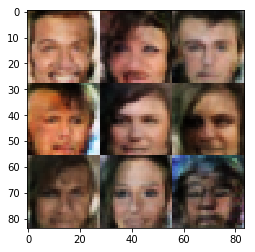

Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 2.5294
Epoch 1/1... Discriminator Loss: 1.1988... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 2.3172... Generator Loss: 0.1603
Epoch 1/1... Discriminator Loss: 1.4434... Generator Loss: 0.4690
Epoch 1/1... Discriminator Loss: 2.8744... Generator Loss: 0.0913
Epoch 1/1... Discriminator Loss: 1.9178... Generator Loss: 0.2701
Epoch 1/1... Discriminator Loss: 2.3031... Generator Loss: 0.1797
Epoch 1/1... Discriminator Loss: 2.9063... Generator Loss: 0.1014
Epoch 1/1... Discriminator Loss: 1.6272... Generator Loss: 0.4471
Epoch 1/1... Discriminator Loss: 2.5236... Generator Loss: 0.1272


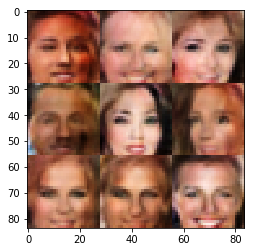

Epoch 1/1... Discriminator Loss: 1.9562... Generator Loss: 0.2223
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 1.3692
Epoch 1/1... Discriminator Loss: 2.3956... Generator Loss: 0.1468
Epoch 1/1... Discriminator Loss: 1.8663... Generator Loss: 0.3301
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 1.3323
Epoch 1/1... Discriminator Loss: 2.1096... Generator Loss: 0.2357
Epoch 1/1... Discriminator Loss: 1.5423... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 2.0550... Generator Loss: 0.2252
Epoch 1/1... Discriminator Loss: 1.0914... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 0.8287... Generator Loss: 1.0805


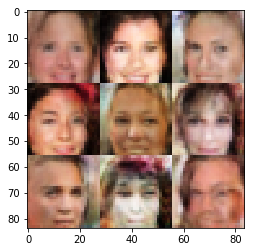

Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.5496... Generator Loss: 0.3817
Epoch 1/1... Discriminator Loss: 2.0933... Generator Loss: 0.2139
Epoch 1/1... Discriminator Loss: 2.6851... Generator Loss: 0.1183
Epoch 1/1... Discriminator Loss: 1.7007... Generator Loss: 0.3062
Epoch 1/1... Discriminator Loss: 2.4278... Generator Loss: 0.1501
Epoch 1/1... Discriminator Loss: 3.2231... Generator Loss: 0.0851
Epoch 1/1... Discriminator Loss: 1.0497... Generator Loss: 2.2299
Epoch 1/1... Discriminator Loss: 1.6346... Generator Loss: 0.4579
Epoch 1/1... Discriminator Loss: 1.5466... Generator Loss: 0.3701


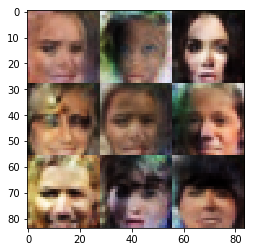

Epoch 1/1... Discriminator Loss: 1.5825... Generator Loss: 0.3926
Epoch 1/1... Discriminator Loss: 2.3819... Generator Loss: 0.1569
Epoch 1/1... Discriminator Loss: 2.6945... Generator Loss: 0.1055
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.4971
Epoch 1/1... Discriminator Loss: 1.0554... Generator Loss: 0.7476
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.0674
Epoch 1/1... Discriminator Loss: 1.7375... Generator Loss: 0.3012
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.7444
Epoch 1/1... Discriminator Loss: 1.3002... Generator Loss: 0.5351
Epoch 1/1... Discriminator Loss: 2.4775... Generator Loss: 0.1936


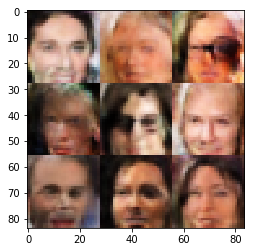

Epoch 1/1... Discriminator Loss: 1.0735... Generator Loss: 0.9619
Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.9140... Generator Loss: 0.2483
Epoch 1/1... Discriminator Loss: 0.7423... Generator Loss: 1.2823
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.8148
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 2.1194... Generator Loss: 0.2081
Epoch 1/1... Discriminator Loss: 2.7429... Generator Loss: 0.1035
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 2.0470... Generator Loss: 0.2058


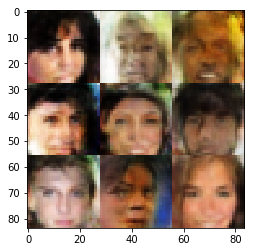

Epoch 1/1... Discriminator Loss: 2.9926... Generator Loss: 0.0884
Epoch 1/1... Discriminator Loss: 0.7758... Generator Loss: 2.1219
Epoch 1/1... Discriminator Loss: 2.1907... Generator Loss: 0.1724
Epoch 1/1... Discriminator Loss: 1.5637... Generator Loss: 0.4415
Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 1.9237... Generator Loss: 0.2806
Epoch 1/1... Discriminator Loss: 2.3449... Generator Loss: 0.1653
Epoch 1/1... Discriminator Loss: 2.5081... Generator Loss: 0.1257
Epoch 1/1... Discriminator Loss: 1.8034... Generator Loss: 0.2658
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.9094


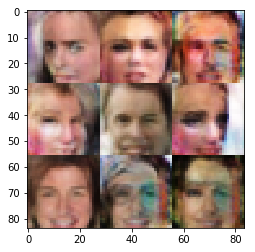

Epoch 1/1... Discriminator Loss: 0.7730... Generator Loss: 1.6484
Epoch 1/1... Discriminator Loss: 1.9750... Generator Loss: 0.2542
Epoch 1/1... Discriminator Loss: 2.2799... Generator Loss: 0.1702
Epoch 1/1... Discriminator Loss: 2.3793... Generator Loss: 0.1413
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.6592... Generator Loss: 0.3621
Epoch 1/1... Discriminator Loss: 2.4616... Generator Loss: 0.1386
Epoch 1/1... Discriminator Loss: 2.0038... Generator Loss: 0.2309
Epoch 1/1... Discriminator Loss: 1.4586... Generator Loss: 0.4832
Epoch 1/1... Discriminator Loss: 2.8353... Generator Loss: 0.0950


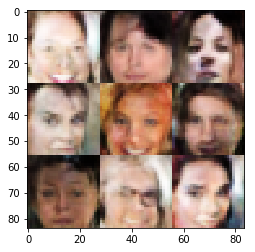

Epoch 1/1... Discriminator Loss: 2.2628... Generator Loss: 0.1835
Epoch 1/1... Discriminator Loss: 1.9885... Generator Loss: 0.2178
Epoch 1/1... Discriminator Loss: 2.4445... Generator Loss: 0.1451
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 0.8670
Epoch 1/1... Discriminator Loss: 3.2255... Generator Loss: 0.0708
Epoch 1/1... Discriminator Loss: 2.0591... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 2.6443... Generator Loss: 0.1203
Epoch 1/1... Discriminator Loss: 2.0223... Generator Loss: 0.2198
Epoch 1/1... Discriminator Loss: 2.4721... Generator Loss: 0.1301
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.5111


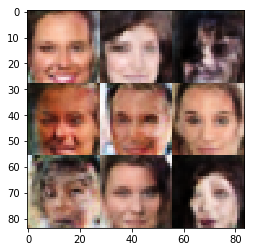

Epoch 1/1... Discriminator Loss: 2.2186... Generator Loss: 0.1784
Epoch 1/1... Discriminator Loss: 3.1498... Generator Loss: 0.0873
Epoch 1/1... Discriminator Loss: 2.0041... Generator Loss: 0.2538
Epoch 1/1... Discriminator Loss: 2.1934... Generator Loss: 0.1772
Epoch 1/1... Discriminator Loss: 2.1597... Generator Loss: 0.2015
Epoch 1/1... Discriminator Loss: 0.8126... Generator Loss: 1.8902
Epoch 1/1... Discriminator Loss: 2.4034... Generator Loss: 0.1360
Epoch 1/1... Discriminator Loss: 0.8808... Generator Loss: 1.8353
Epoch 1/1... Discriminator Loss: 2.9532... Generator Loss: 0.1051
Epoch 1/1... Discriminator Loss: 2.1249... Generator Loss: 0.2172


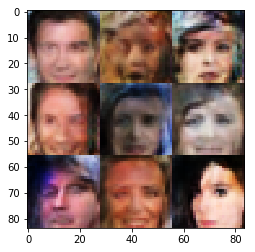

Epoch 1/1... Discriminator Loss: 1.2670... Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 2.3089... Generator Loss: 0.1576
Epoch 1/1... Discriminator Loss: 1.8009... Generator Loss: 0.3074
Epoch 1/1... Discriminator Loss: 2.7844... Generator Loss: 0.0954
Epoch 1/1... Discriminator Loss: 3.2387... Generator Loss: 0.0647
Epoch 1/1... Discriminator Loss: 1.1441... Generator Loss: 0.6172
Epoch 1/1... Discriminator Loss: 2.0180... Generator Loss: 0.2448
Epoch 1/1... Discriminator Loss: 1.1925... Generator Loss: 0.6493
Epoch 1/1... Discriminator Loss: 1.6705... Generator Loss: 0.3513
Epoch 1/1... Discriminator Loss: 2.0080... Generator Loss: 0.2170


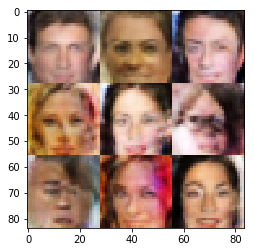

Epoch 1/1... Discriminator Loss: 2.3659... Generator Loss: 0.1640
Epoch 1/1... Discriminator Loss: 2.4037... Generator Loss: 0.2194
Epoch 1/1... Discriminator Loss: 0.5864... Generator Loss: 1.7863
Epoch 1/1... Discriminator Loss: 0.9214... Generator Loss: 1.3010
Epoch 1/1... Discriminator Loss: 1.2672... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 2.5661... Generator Loss: 0.1355
Epoch 1/1... Discriminator Loss: 2.2038... Generator Loss: 0.1701
Epoch 1/1... Discriminator Loss: 1.7991... Generator Loss: 0.3230
Epoch 1/1... Discriminator Loss: 0.5811... Generator Loss: 1.8138
Epoch 1/1... Discriminator Loss: 1.7359... Generator Loss: 0.3164


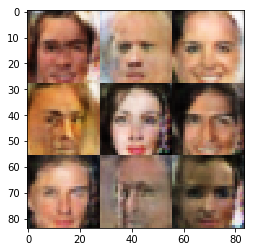

Epoch 1/1... Discriminator Loss: 2.5876... Generator Loss: 0.1196
Epoch 1/1... Discriminator Loss: 1.8223... Generator Loss: 0.3003
Epoch 1/1... Discriminator Loss: 0.8960... Generator Loss: 1.2026
Epoch 1/1... Discriminator Loss: 1.3112... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.4979
Epoch 1/1... Discriminator Loss: 1.6475... Generator Loss: 0.3217
Epoch 1/1... Discriminator Loss: 0.6568... Generator Loss: 1.3542
Epoch 1/1... Discriminator Loss: 2.5630... Generator Loss: 0.1243
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 0.9167
Epoch 1/1... Discriminator Loss: 0.8866... Generator Loss: 1.1224


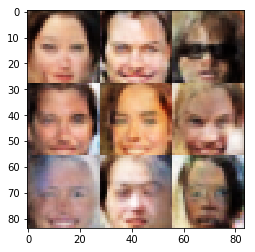

Epoch 1/1... Discriminator Loss: 2.3993... Generator Loss: 0.1622
Epoch 1/1... Discriminator Loss: 1.8820... Generator Loss: 0.2675
Epoch 1/1... Discriminator Loss: 2.3626... Generator Loss: 0.1540
Epoch 1/1... Discriminator Loss: 2.1725... Generator Loss: 0.1886
Epoch 1/1... Discriminator Loss: 2.5289... Generator Loss: 0.1263
Epoch 1/1... Discriminator Loss: 1.5552... Generator Loss: 0.4541


In [14]:
batch_size = 16
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5
alpha = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.